<a href="https://colab.research.google.com/github/Emma-Ok/Data-science-project/blob/main/classroom_project/Cp1_variable_analysis_Emmanuel_Valbuena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# 1.1 Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
from collections import Counter

# Suppress all warnings
warnings.filterwarnings('ignore')

# Para garantizar que las gráficas se muestren en Colab
%matplotlib inline

# 1.2 Configuración de estilo para visualizaciones
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_theme(style="whitegrid", palette="viridis")  # Tema personalizado
url = "https://raw.githubusercontent.com/Emma-Ok/Data-science-project/main/sources/master_df.csv"
df = pd.read_csv(url)
df = df.drop(columns=['id_player'])

In [41]:
print("\n📋 INFORMACIÓN GENERAL DEL DATASET:")
print("-" * 40)
print(f"• Número total de registros: {df.shape[0]}")
print(f"• Número total de variables: {df.shape[1]}")


📋 INFORMACIÓN GENERAL DEL DATASET:
----------------------------------------
• Número total de registros: 908
• Número total de variables: 50


<span style="color:Blue;"><strong>1. Introducción</strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
En el fútbol moderno, la toma de decisiones estratégicas basada en datos se ha convertido en un factor determinante para el éxito competitivo. El presente proyecto de investigación se centra en analizar los patrones de rendimiento de los jugadores participantes en la UEFA Champions League 2025, con el objetivo de identificar los factores clave que determinan la excelencia deportiva en el máximo nivel de competición europea. Preguntas de Investigación Principales:
¿Cuáles son los patrones de rendimiento que caracterizan a los jugadores

*   ¿Cuáles son los patrones de rendimiento que caracterizan a los jugadores de élite en la Champions League 2025?
*   ¿Qué factores técnicos, físicos y tácticos determinan el éxito ofensivo y defensivo de los jugadores?
* ¿Cómo se distribuye el talento y las características de rendimiento por posiciones y equipos?
* ¿Existen correlaciones significativas entre las características físicas de los jugadores y su rendimiento en el campo?
* ¿Cuál es el perfil de rendimiento específico del Real Madrid en comparación con el resto de equipos participantes?.

</div>
<br>
<div style="background-color:#E8F5E9; padding:10px; border-radius:8px;">
<b> 2. Contexto:</b>  ¿por qué es relevante este problema?
</div>

La UEFA Champions League representa la máxima expresión del fútbol de clubes a nivel mundial, reuniendo a los mejores equipos y jugadores del continente europeo. En la temporada 2025, esta competición continúa siendo el laboratorio más exigente para evaluar el rendimiento deportivo de élite, donde cada estadística puede marcar la diferencia entre la gloria y la eliminación.

<div style="background-color:#FFF9C4; padding:10px; border-radius:8px;">
<b> 3. Relación entre el problema y la base de datos seleccionada. </b>  
</div>

  El dataset seleccionado para este análisis proviene de fuentes oficiales de la UEFA y scraping del sitio web oficial de la Champions League, lo que garantiza la autenticidad y precisión de los datos. Con 908 registros de jugadores y 51 variables que abarcan múltiples dimensiones del rendimiento, esta base de datos representa una fuente invaluable para el análisis propuesto.

In [42]:
# 1. Cargar datos
url = "https://raw.githubusercontent.com/Emma-Ok/Data-science-project/main/sources/master_df.csv"
df = pd.read_csv(url)

df = df.drop(columns=['id_player'], errors="ignore")


---
# 📊 **SECCIÓN 1: CLASIFICACIÓN Y DOCUMENTACIÓN DE VARIABLES**
---

En esta sección clasificaremos todas las variables del dataset según su naturaleza:
- **Variables Continuas**: Valores numéricos con infinitos valores posibles en un rango
- **Variables Discretas**: Valores numéricos contables (enteros)
- **Variables Categóricas**: Valores que representan categorías o grupos

In [43]:
# ==============================================================================
# 1.1 INSPECCIÓN INICIAL DEL DATASET
# ==============================================================================

print("🔍 EXPLORACIÓN INICIAL DEL DATASET")
print("=" * 80)
print(f"\n📌 Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas\n")

# Mostrar primeras filas
print("📋 Primeras 5 filas del dataset:")
print(df.head())

print("\n" + "=" * 80)
print("📊 INFORMACIÓN GENERAL DE LAS VARIABLES")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("🔢 TIPOS DE DATOS PRESENTES")
print("=" * 80)
print(df.dtypes.value_counts())

🔍 EXPLORACIÓN INICIAL DEL DATASET

📌 Dimensiones del dataset: 908 filas × 50 columnas

📋 Primeras 5 filas del dataset:
         player_name  nationality field_position            position  \
0         Harry Kane      England        Forward             STRIKER   
1    Viktor Gyökeres       Sweden        Forward                 NaN   
2    Vinícius Júnior       Brazil        Forward             UNKNOWN   
3  Tijjani Reijnders  Netherlands     Midfielder  CENTRAL_MIDFIELDER   
4  Maghnes Akliouche       France     Midfielder             UNKNOWN   

   weight(kg)  height(cm)  age  id_team  fouls_committed  fouls_suffered  ...  \
0        65.0       188.0   31    50037              2.0             6.0  ...   
1         NaN         NaN   26    50149             10.0             7.0  ...   
2         NaN         NaN   24    50051              8.0             4.0  ...   
3         NaN         NaN   26    50058              1.0             2.0  ...   
4         NaN         NaN   22    50023    

In [44]:
# ==============================================================================
# CLASIFICACIÓN AUTOMÁTICA DE VARIABLES POR TIPO
# ==============================================================================

def clasificar_variables(dataframe):
    categorical_vars = [
          "player_name",
          "nationality",
          "field_position",
          "position",
          "team",
          "id_team",
      ]

    discrete_vars = [
          "age",
          "yellow_cards",
          "red_cards",
          "matches_appearance",
          "assists",
          "corners_taken",
          "offsides",
          "dribbles",
          "goals",
          "inside_area",
          "outside_area",
          "right_foot",
          "left_foot",
          "head",
          "other",
          "penalties_scored",
          "saves",
          "goals_conceded",
          "saves_on_penalty",
          "clean_sheets",
          "punches_made",
          "balls_recovered",
          "tackles",
          "tackles_won",
          "tackles_lost",
          "clearance_attempted",
      ]

    continuous_vars = [
          "weight(kg)",
          "height(cm)",
          "fouls_committed",
          "fouls_suffered",
          "total_attempts",
          "attempts_on_target",
          "attempts_off_target",
          "blocked",
          "passing_accuracy(%)",
          "passes_attempted",
          "passes_completed",
          "crossing_accuracy(%)",
          "crosses_attempted",
          "crosses_completed",
          "free_kick_taken",
          "distance_covered(km/h)",
          "top_speed",
          "minutes_played",
      ]
    return categorical_vars, discrete_vars, continuous_vars


# Aplicar clasificación
categorical_vars, discrete_vars, continuous_vars  = clasificar_variables(df)

print("🎯 CLASIFICACIÓN DE VARIABLES")
print("=" * 80)
print(f"\n✅ Variables CONTINUAS ({len(continuous_vars)}):")
print("   ", continuous_vars[:], "...")

print(f"\n✅ Variables DISCRETAS ({len(discrete_vars)}):")
print("   ", discrete_vars[:], "..." )

print(f"\n✅ Variables CATEGÓRICAS ({len(categorical_vars)}):")
print("   ", categorical_vars[:])


🎯 CLASIFICACIÓN DE VARIABLES

✅ Variables CONTINUAS (18):
    ['weight(kg)', 'height(cm)', 'fouls_committed', 'fouls_suffered', 'total_attempts', 'attempts_on_target', 'attempts_off_target', 'blocked', 'passing_accuracy(%)', 'passes_attempted', 'passes_completed', 'crossing_accuracy(%)', 'crosses_attempted', 'crosses_completed', 'free_kick_taken', 'distance_covered(km/h)', 'top_speed', 'minutes_played'] ...

✅ Variables DISCRETAS (26):
    ['age', 'yellow_cards', 'red_cards', 'matches_appearance', 'assists', 'corners_taken', 'offsides', 'dribbles', 'goals', 'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head', 'other', 'penalties_scored', 'saves', 'goals_conceded', 'saves_on_penalty', 'clean_sheets', 'punches_made', 'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost', 'clearance_attempted'] ...

✅ Variables CATEGÓRICAS (6):
    ['player_name', 'nationality', 'field_position', 'position', 'team', 'id_team']


In [45]:
# =====================================================================
# DICCIONARIO DE VARIABLES COMPLETO - UEFA CHAMPIONS LEAGUE 2025
# =====================================================================

variables_seleccionadas = {
    # ================================================================
    # VARIABLES CATEGÓRICAS
    # ================================================================
    'player_name': {
        'Tipo': 'Categórica',
        'Definición': 'Nombre completo del jugador registrado en la competición.',
        'Fuente': 'UEFA Champions League - Registro oficial de plantilla'
    },
    'nationality': {
        'Tipo': 'Categórica',
        'Definición': 'Nacionalidad o país de origen del jugador.',
        'Fuente': 'UEFA Champions League - Registro oficial de jugadores'
    },
    'field_position': {
        'Tipo': 'Categórica',
        'Definición': 'Ubicación general del jugador en el campo (portero, defensa, mediocampista o delantero).',
        'Fuente': 'UEFA Champions League - Clasificación oficial de posiciones'
    },
    'position': {
        'Tipo': 'Categórica',
        'Definición': 'Posición específica del jugador en el campo (ej: FW, MF, DF, GK).',
        'Fuente': 'UEFA Champions League - Clasificación oficial de posiciones'
    },
    'team': {
        'Tipo': 'Categórica',
        'Definición': 'Nombre del equipo al que pertenece el jugador.',
        'Fuente': 'UEFA Champions League - Datos oficiales de plantilla'
    },

    # ================================================================
    # VARIABLES DISCRETAS
    # ================================================================
    'age': {
        'Tipo': 'Discreta',
        'Definición': 'Edad del jugador expresada en años completos.',
        'Fuente': 'UEFA Champions League - Registro oficial de jugadores'
    },
    'id_team': {
        'Tipo': 'Discreta',
        'Definición': 'Identificador numérico único del equipo al que pertenece el jugador.',
        'Fuente': 'UEFA Champions League - Codificación interna de equipos'
    },
    'yellow_cards': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de tarjetas amarillas recibidas por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas disciplinarias oficiales'
    },
    'red_cards': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de tarjetas rojas recibidas por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas disciplinarias oficiales'
    },
    'matches_appearance': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de partidos en los que el jugador ha participado.',
        'Fuente': 'UEFA Champions League - Actas oficiales de partido'
    },
    'assists': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de asistencias de gol realizadas por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas de rendimiento oficial'
    },
    'corners_taken': {
        'Tipo': 'Discreta',
        'Definición': 'Número de tiros de esquina ejecutados por el jugador.',
        'Fuente': 'UEFA Champions League - Datos de rendimiento técnico'
    },
    'offsides': {
        'Tipo': 'Discreta',
        'Definición': 'Número de veces que el jugador ha estado en posición de fuera de juego.',
        'Fuente': 'UEFA Champions League - Estadísticas de partido'
    },
    'dribbles': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de regates exitosos realizados por el jugador.',
        'Fuente': 'UEFA Champions League - Datos de rendimiento ofensivo'
    },
    'goals': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de goles anotados por el jugador en la temporada.',
        'Fuente': 'UEFA Champions League - Estadísticas de rendimiento oficial'
    },
    'inside_area': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de goles o tiros realizados dentro del área.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'outside_area': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de goles o tiros realizados desde fuera del área.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'right_foot': {
        'Tipo': 'Discreta',
        'Definición': 'Número de goles o disparos realizados con el pie derecho.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'left_foot': {
        'Tipo': 'Discreta',
        'Definición': 'Número de goles o disparos realizados con el pie izquierdo.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'head': {
        'Tipo': 'Discreta',
        'Definición': 'Número de goles o disparos realizados con la cabeza.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'other': {
        'Tipo': 'Discreta',
        'Definición': 'Número de goles o disparos realizados con otra parte del cuerpo.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'penalties_scored': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de penales convertidos en gol por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas oficiales'
    },
    'saves': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de atajadas realizadas por el portero.',
        'Fuente': 'UEFA Champions League - Estadísticas de porteros'
    },
    'goals_conceded': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de goles recibidos por el portero.',
        'Fuente': 'UEFA Champions League - Estadísticas de porteros'
    },
    'saves_on_penalty': {
        'Tipo': 'Discreta',
        'Definición': 'Número de penales detenidos por el portero.',
        'Fuente': 'UEFA Champions League - Estadísticas de porteros'
    },
    'clean_sheets': {
        'Tipo': 'Discreta',
        'Definición': 'Número de partidos en los que el portero mantuvo su arco invicto.',
        'Fuente': 'UEFA Champions League - Estadísticas de porteros'
    },
    'punches_made': {
        'Tipo': 'Discreta',
        'Definición': 'Número de despejes con los puños realizados por el portero.',
        'Fuente': 'UEFA Champions League - Estadísticas de porteros'
    },
    'balls_recovered': {
        'Tipo': 'Discreta',
        'Definición': 'Número de veces que el jugador recuperó la posesión del balón.',
        'Fuente': 'UEFA Champions League - Datos de rendimiento defensivo'
    },
    'tackles': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de entradas o barridas realizadas por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas defensivas oficiales'
    },
    'tackles_won': {
        'Tipo': 'Discreta',
        'Definición': 'Número de entradas ganadas exitosamente por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas defensivas oficiales'
    },
    'tackles_lost': {
        'Tipo': 'Discreta',
        'Definición': 'Número de entradas fallidas o perdidas por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas defensivas oficiales'
    },
    'clearance_attempted': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad de despejes o rechazos intentados por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas defensivas oficiales'
    },

    # ================================================================
    # VARIABLES CONTINUAS
    # ================================================================
    'weight(kg)': {
        'Tipo': 'Continua',
        'Definición': 'Peso corporal del jugador expresado en kilogramos (kg).',
        'Fuente': 'UEFA Champions League - Ficha biométrica oficial del jugador'
    },
    'height(cm)': {
        'Tipo': 'Continua',
        'Definición': 'Altura total del jugador medida en centímetros (cm).',
        'Fuente': 'UEFA Champions League - Ficha biométrica oficial del jugador'
    },
    'fouls_committed': {
        'Tipo': 'Continua',
        'Definición': 'Promedio de faltas cometidas por partido.',
        'Fuente': 'UEFA Champions League - Estadísticas disciplinarias oficiales'
    },
    'fouls_suffered': {
        'Tipo': 'Continua',
        'Definición': 'Promedio de faltas recibidas por partido.',
        'Fuente': 'UEFA Champions League - Estadísticas disciplinarias oficiales'
    },
    'total_attempts': {
        'Tipo': 'Continua',
        'Definición': 'Promedio total de intentos de disparo realizados por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'attempts_on_target': {
        'Tipo': 'Continua',
        'Definición': 'Número de tiros que fueron dirigidos al arco.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'attempts_off_target': {
        'Tipo': 'Continua',
        'Definición': 'Número de tiros desviados fuera del arco.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'blocked': {
        'Tipo': 'Continua',
        'Definición': 'Número de tiros bloqueados por defensores o rivales.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },
    'passing_accuracy(%)': {
        'Tipo': 'Continua',
        'Definición': 'Porcentaje de precisión en los pases realizados por el jugador.',
        'Fuente': 'UEFA Champions League - Datos oficiales temporada 2025'
    },
    'passes_attempted': {
        'Tipo': 'Continua',
        'Definición': 'Cantidad total de pases intentados por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas de pases'
    },
    'passes_completed': {
        'Tipo': 'Continua',
        'Definición': 'Cantidad total de pases completados con éxito.',
        'Fuente': 'UEFA Champions League - Estadísticas de pases'
    },
    'crossing_accuracy(%)': {
        'Tipo': 'Continua',
        'Definición': 'Porcentaje de acierto en los centros enviados por el jugador.',
        'Fuente': 'UEFA Champions League - Datos oficiales temporada 2025'
    },
    'crosses_attempted': {
        'Tipo': 'Continua',
        'Definición': 'Cantidad total de centros intentados por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas de juego ofensivo'
    },
    'crosses_completed': {
        'Tipo': 'Continua',
        'Definición': 'Cantidad total de centros completados exitosamente.',
        'Fuente': 'UEFA Champions League - Estadísticas de juego ofensivo'
    },
    'free_kick_taken': {
        'Tipo': 'Continua',
        'Definición': 'Número promedio de tiros libres ejecutados por el jugador.',
        'Fuente': 'UEFA Champions League - Estadísticas de balón parado'
    },
    'distance_covered(km/h)': {
        'Tipo': 'Continua',
        'Definición': 'Distancia total recorrida por el jugador durante los partidos (en km/h).',
        'Fuente': 'UEFA Champions League - Tracking físico oficial'
    },
    'top_speed': {
        'Tipo': 'Continua',
        'Definición': 'Velocidad máxima alcanzada por el jugador durante un partido.',
        'Fuente': 'UEFA Champions League - Sistema de tracking físico oficial'
    },
    'minutes_played': {
        'Tipo': 'Continua',
        'Definición': 'Minutos totales disputados por el jugador en la competición.',
        'Fuente': 'UEFA Champions League - Actas oficiales de partido'
    },
}

# =====================================================================
# CREAR Y MOSTRAR TABLA DESCRIPTIVA
# =====================================================================
import pandas as pd

tabla_descriptiva = pd.DataFrame.from_dict(variables_seleccionadas, orient='index')
tabla_descriptiva.index.name = 'Variable'
tabla_descriptiva.reset_index(inplace=True)

print("\n" + "=" * 100)
print(" TABLA DESCRIPTIVA DE VARIABLES - UEFA CHAMPIONS LEAGUE 2025")
print("=" * 100)
print(tabla_descriptiva.to_string(index=False))
print("=" * 100)



 TABLA DESCRIPTIVA DE VARIABLES - UEFA CHAMPIONS LEAGUE 2025
              Variable       Tipo                                                                               Definición                                                        Fuente
           player_name Categórica                                Nombre completo del jugador registrado en la competición.         UEFA Champions League - Registro oficial de plantilla
           nationality Categórica                                               Nacionalidad o país de origen del jugador.         UEFA Champions League - Registro oficial de jugadores
        field_position Categórica Ubicación general del jugador en el campo (portero, defensa, mediocampista o delantero).   UEFA Champions League - Clasificación oficial de posiciones
              position Categórica                        Posición específica del jugador en el campo (ej: FW, MF, DF, GK).   UEFA Champions League - Clasificación oficial de posiciones
             

In [46]:
# ============================================================
# VARIABLES SELECCIONADAS PARA EL ANÁLISIS DE RENDIMIENTO UEFA 2025
# ============================================================

variables_seleccionadas = {
    # Discretas
    'age': {
        'Tipo': 'Discreta',
        'Definición': 'Edad del jugador expresada en años completos.',
        'Relevancia': 'Permite analizar la relación entre la madurez deportiva y el rendimiento técnico-físico.',
        'Fuente': 'UEFA Champions League - Registro oficial de jugadores 2025'
    },
    'goals': {
        'Tipo': 'Discreta',
        'Definición': 'Número total de goles anotados por el jugador en la temporada.',
        'Relevancia': 'Mide directamente la eficacia ofensiva y capacidad de finalización.',
        'Fuente': 'UEFA Champions League - Estadísticas oficiales 2025'
    },
    'assists': {
        'Tipo': 'Discreta',
        'Definición': 'Cantidad total de asistencias realizadas por el jugador.',
        'Relevancia': 'Evalúa la creatividad y contribución al juego colectivo.',
        'Fuente': 'UEFA Champions League - Estadísticas oficiales 2025'
    },
    'tackles_won': {
        'Tipo': 'Discreta',
        'Definición': 'Número de entradas exitosas en disputa de balón.',
        'Relevancia': 'Refleja la efectividad defensiva y capacidad de recuperación.',
        'Fuente': 'UEFA Champions League - Estadísticas defensivas oficiales 2025'
    },
    'total_attempts': {
        'Tipo': 'Continua',
        'Definición': 'Promedio total de intentos de disparo realizados por el jugador.',
        'Relevancia': 'Refleja la efectividad para hacer tiros al arco.',
        'Fuente': 'UEFA Champions League - Estadísticas de tiro'
    },


    # Continuas
    'passing_accuracy(%)': {
        'Tipo': 'Continua',
        'Definición': 'Porcentaje de precisión en los pases realizados.',
        'Relevancia': 'Mide la calidad técnica y toma de decisiones con balón.',
        'Fuente': 'UEFA Champions League - Datos técnicos oficiales 2025'
    },
    'distance_covered(km/h)': {
        'Tipo': 'Continua',
        'Definición': 'Distancia total recorrida por el jugador durante los partidos (en km/h).',
        'Relevancia': 'Evalúa la capacidad física y resistencia durante el juego.',
        'Fuente': 'UEFA Champions League - Sistema de tracking físico 2025'
    },
    'top_speed': {
        'Tipo': 'Continua',
        'Definición': 'Velocidad máxima alcanzada por el jugador durante el torneo.',
        'Relevancia': 'Refleja la potencia y desempeño físico explosivo.',
        'Fuente': 'UEFA Champions League - Sistema de tracking físico 2025'
    },
    'minutes_played':{
        'Tipo': 'Continua',
        'Definición': 'Velocidad máxima alcanzada por el jugador durante el torneo.',
        'Relevancia': 'Refleja la potencia y desempeño físico explosivo.',
        'Fuente': 'UEFA Champions League - Sistema de tracking físico 2025'
    }
}


# Crear DataFrame con la tabla descriptiva
tabla_descriptiva = pd.DataFrame.from_dict(variables_seleccionadas, orient='index')
tabla_descriptiva.index.name = 'Variable'
tabla_descriptiva.reset_index(inplace=True)

# Mostrar tabla con estilo
print("\n" + "=" * 100)
print("📋 TABLA DESCRIPTIVA DE VARIABLES SELECCIONADAS PARA EL ANÁLISIS")
print("=" * 100)
print(tabla_descriptiva.to_string(index=False))
print("=" * 100)

# Guardar tabla como CSV para referencia
tabla_descriptiva.to_csv('tabla_descriptiva_variables.csv', index=False, encoding='utf-8-sig')



📋 TABLA DESCRIPTIVA DE VARIABLES SELECCIONADAS PARA EL ANÁLISIS
              Variable     Tipo                                                               Definición                                                                               Relevancia                                                         Fuente
                   age Discreta                            Edad del jugador expresada en años completos. Permite analizar la relación entre la madurez deportiva y el rendimiento técnico-físico.     UEFA Champions League - Registro oficial de jugadores 2025
                 goals Discreta           Número total de goles anotados por el jugador en la temporada.                      Mide directamente la eficacia ofensiva y capacidad de finalización.            UEFA Champions League - Estadísticas oficiales 2025
               assists Discreta                 Cantidad total de asistencias realizadas por el jugador.                                 Evalúa la creatividad y con

---
# 📊 **SECCIÓN 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
---

En esta sección realizaremos un análisis exploratorio completo que incluye:
1. **Estadísticos descriptivos** de las variables seleccionadas
2. **Visualizaciones univariadas**: Distribución de cada variable
3. **Visualizaciones bivariadas/multivariadas**: Relaciones entre variables
4. **Interpretaciones** de hallazgos y patrones identificados

In [47]:
# ==============================================================================
# 2.1 ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CONTINUAS
# ==============================================================================

# Variables continuas principales
vars_continuas_principales = ['passing_accuracy(%)', 'distance_covered(km/h)', 'top_speed',
                               'minutes_played']

print("📈 ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CONTINUAS")
print("=" * 100)

# Estadísticos completos
stats_continuas = df[vars_continuas_principales].describe().T
stats_continuas['rango'] = stats_continuas['max'] - stats_continuas['min']
stats_continuas['CV(%)'] = (stats_continuas['std'] / stats_continuas['mean']) * 100  # Coeficiente de variación

print(stats_continuas.round(2))

print("\n" + "=" * 100)
print("💡 INTERPRETACIÓN - Variables Continuas:")
print("=" * 100)
for var in vars_continuas_principales:
    if var in df.columns:
        media = df[var].mean()
        std = df[var].std()
        print(f"\n📌 {var}:")
        print(f"   • Media: {media:.2f} | Desviación: {std:.2f}")
        print(f"   • Rango: [{df[var].min():.2f}, {df[var].max():.2f}]")

# Datos faltantes
print("\n" + "=" * 100)
print("🔍 ANÁLISIS DE DATOS FALTANTES")
print("=" * 100)
missing_continuas = df[vars_continuas_principales].isnull().sum()
print(missing_continuas[missing_continuas > 0] if missing_continuas.sum() > 0 else "✅ No hay datos faltantes en variables continuas")

📈 ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CONTINUAS
                        count    mean     std    min    25%     50%     75%  \
passing_accuracy(%)     727.0   81.49   15.00   0.00  77.00   85.00   90.58   
distance_covered(km/h)  727.0   22.38   13.72   0.33  10.46   21.48   34.27   
top_speed               727.0   31.22    2.79  19.51  30.22   31.81   33.02   
minutes_played          727.0  190.43  117.95   1.00  90.00  186.00  296.00   

                           max   rango  CV(%)  
passing_accuracy(%)     100.00  100.00  18.40  
distance_covered(km/h)   50.46   50.13  61.32  
top_speed                36.55   17.04   8.93  
minutes_played          360.00  359.00  61.94  

💡 INTERPRETACIÓN - Variables Continuas:

📌 passing_accuracy(%):
   • Media: 81.49 | Desviación: 15.00
   • Rango: [0.00, 100.00]

📌 distance_covered(km/h):
   • Media: 22.38 | Desviación: 13.72
   • Rango: [0.33, 50.46]

📌 top_speed:
   • Media: 31.22 | Desviación: 2.79
   • Rango: [19.51, 36.55]

📌 minutes_play

## 🧩 Conclusiones — Estadísticos Descriptivos de Variables Continuas

El análisis de las principales variables continuas revela una **amplia heterogeneidad en el desempeño y participación de los jugadores**, con patrones coherentes con la naturaleza competitiva del torneo:

### ⚽ `passing_accuracy(%)`
- Con una media del **81.5%** y un rango completo hasta el **100%**, la precisión de pase muestra un **rendimiento técnico globalmente alto**, aunque la desviación del **15%** sugiere una dispersión notable entre roles (defensivos vs ofensivos).
- Los valores mínimos de **0%** son anómalos o asociados a jugadores con **muy poca participación** (por ejemplo, suplentes con minutos marginales).

### 🏃 `distance_covered(km/h)`
- Promedia **22.4 km/h**, pero con una desviación estándar de **13.7**, evidenciando una **gran variabilidad en la intensidad física**.
- El **coeficiente de variación (61.3%)** indica que la distancia recorrida es una de las métricas más volátiles, dependiente del **rol táctico** (por ejemplo, mediocampistas vs porteros).

### ⚡ `top_speed`
- Se mantiene relativamente estable (media **31.2 km/h**, CV ≈ **9%**), lo que sugiere que la **velocidad punta** no es un diferenciador extremo entre jugadores de campo.
- Aun así, los valores máximos (>35 km/h) reflejan la presencia de jugadores explosivos, típicos en posiciones ofensivas o de banda.

### ⏱️ `minutes_played`
- Con una media de **190 minutos**, pero un rango extremo de **1 a 360**, se evidencia una **distribución fuertemente asimétrica**.
- La alta desviación (**117.9 min**) indica una mezcla entre **jugadores titulares regulares y suplentes ocasionales**, lo que impacta fuertemente las demás métricas de rendimiento.

### 🧮 Datos Faltantes
- Cada variable presenta **181 observaciones faltantes (≈20%)**, posiblemente asociadas a **jugadores sin registros completos de rendimiento físico o técnico**.
- Este nivel de missing data requerirá **imputación controlada** o exclusión selectiva antes de aplicar modelos multivariados (como Isolation Forest o PCA).

---

💬 **En síntesis**, las métricas reflejan una **alta consistencia general en las variables técnicas (pases, velocidad)** y **gran disparidad en las variables de carga y participación (minutos, distancia)**.  
Esta diferencia anticipa que los métodos de detección de outliers podrían **identificar principalmente anomalías en rendimiento físico o participación**, más que en habilidad técnica.

---


In [48]:
# ==============================================================================
# 2.2 ESTADÍSTICOS DESCRIPTIVOS - VARIABLES DISCRETAS
# ==============================================================================

# Variables discretas principales
vars_discretas_principales = ['goals', 'assists', 'total_attempts', 'tackles_won', 'age']

print("📊ESTADÍSTICOS DESCRIPTIVOS - VARIABLES DISCRETAS")
print("=" * 100)

stats_discretas = df[vars_discretas_principales].describe().T
stats_discretas['moda'] = df[vars_discretas_principales].mode().iloc[0]

print(stats_discretas.round(2))

print("\n" + "=" * 100)
print("💡 INTERPRETACIÓN - Variables Discretas:")
print("=" * 100)
for var in vars_discretas_principales:
    if var in df.columns:
        print(f"\n📌 {var}:")
        print(f"   • Mediana: {df[var].median():.0f} | Moda: {df[var].mode()[0] if len(df[var].mode()) > 0 else 'N/A'}")
        print(f"   • Q1: {df[var].quantile(0.25):.0f} | Q3: {df[var].quantile(0.75):.0f}")
        print(f"   • Total acumulado: {df[var].sum():.0f}")

# Datos faltantes
print("\n" + "=" * 100)
print("🔍 ANÁLISIS DE DATOS FALTANTES")
print("=" * 100)
missing_discretas = df[vars_discretas_principales].isnull().sum()
print(missing_discretas[missing_discretas > 0] if missing_discretas.sum() > 0 else "✅ No hay datos faltantes en variables discretas")

📊ESTADÍSTICOS DESCRIPTIVOS - VARIABLES DISCRETAS
                count   mean   std   min   25%   50%   75%   max  moda
goals           727.0   0.28  0.72   0.0   0.0   0.0   0.0   5.0   0.0
assists         727.0   0.22  0.55   0.0   0.0   0.0   0.0   4.0   0.0
total_attempts  727.0   2.57  3.27   0.0   0.0   1.0   4.0  21.0   0.0
tackles_won     727.0   1.08  1.48   0.0   0.0   1.0   2.0  10.0   0.0
age             908.0  24.71  4.70  16.0  21.0  24.0  28.0  39.0  25.0

💡 INTERPRETACIÓN - Variables Discretas:

📌 goals:
   • Mediana: 0 | Moda: 0.0
   • Q1: 0 | Q3: 0
   • Total acumulado: 206

📌 assists:
   • Mediana: 0 | Moda: 0.0
   • Q1: 0 | Q3: 0
   • Total acumulado: 158

📌 total_attempts:
   • Mediana: 1 | Moda: 0.0
   • Q1: 0 | Q3: 4
   • Total acumulado: 1868

📌 tackles_won:
   • Mediana: 1 | Moda: 0.0
   • Q1: 0 | Q3: 2
   • Total acumulado: 782

📌 age:
   • Mediana: 24 | Moda: 25
   • Q1: 21 | Q3: 28
   • Total acumulado: 22438

🔍 ANÁLISIS DE DATOS FALTANTES
goals             

## 🧩 Conclusiones — Estadísticos Descriptivos de Variables Discretas

El análisis de las variables discretas muestra un panorama claro del **rendimiento ofensivo y defensivo individual**, destacando una marcada **asimetría positiva** (muchos valores bajos y pocos altos), lo que sugiere que **solo una minoría de jugadores** acumula la mayoría de los eventos destacados (goles, asistencias, intentos).

---

### ⚽ `goals`
- Media de **0.28** y mediana **0**, con moda **0**, lo que indica que **la mayoría de los jugadores no marcaron goles** durante el periodo analizado.  
- Los valores máximos (**5 goles**) corresponden a delanteros destacados, mientras que el rango de dispersión refleja **una fuerte concentración en valores bajos** (CV alto).

### 🎯 `assists`
- Comportamiento muy similar a los goles: media **0.22**, mediana **0**, y moda **0**.  
- La baja frecuencia de asistencias muestra que **solo ciertos jugadores ofensivos** contribuyen significativamente a la generación de juego, mientras que la mayoría mantiene registros nulos o mínimos.

### 🔫 `total_attempts`
- Presenta una media de **2.57** y un rango amplio hasta **21 intentos**, lo que sugiere **alta desigualdad en la generación de oportunidades**.  
- Los pocos jugadores con valores altos dominan las acciones ofensivas, reforzando la hipótesis de **distribución de rendimiento concentrada** en roles específicos (extremos o delanteros).

### 🛡️ `tackles_won`
- Media de **1.08** y mediana **1**, lo que indica que la mayoría de los jugadores logran **entre 0 y 2 tackles ganados** por partido.  
- Los valores máximos (hasta **10**) son excepcionales y probablemente asociados a **jugadores defensivos con alta carga de trabajo**, como mediocentros o laterales.

### 👤 `age`
- Distribución normal moderadamente centrada: media **24.7 años**, rango **[16, 39]**.  
- El 50% de los jugadores se encuentra entre **21 y 28 años**, lo que representa el **pico de madurez deportiva**.  
- La dispersión controlada (CV ≈ 19%) indica una **estructura etaria homogénea**, con escasa representación de jugadores veteranos.

---

### 🔍 Datos Faltantes
- Se identifican **181 registros faltantes** en las métricas de rendimiento (≈20%), aunque la variable `age` está completa.  
- Los faltantes probablemente se deben a **jugadores sin minutos disputados o con datos incompletos de rendimiento individual**, por lo que se recomienda tratarlos de manera diferenciada en etapas posteriores (p. ej., imputación por posición o exclusión controlada).

---

💬 **En síntesis**, las variables discretas revelan un claro **efecto de concentración del rendimiento**: pocos jugadores generan la mayoría de las acciones ofensivas, mientras que el resto mantiene valores bajos o nulos.  
Este patrón es típico en competiciones de élite y será clave para entender **cómo los outliers reflejan tanto desempeño sobresaliente como falta de participación**.

---


In [49]:
# ==============================================================================
# 2.3 ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CATEGÓRICAS
# ==============================================================================

vars_categoricas_principales = ['position', 'team', 'nationality']

print("🏷️ ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CATEGÓRICAS")
print("=" * 100)

for var in vars_categoricas_principales:
    if var in df.columns:
        print(f"\n📌 {var.upper()}:")
        print("-" * 100)
        freq = df[var].value_counts().head(10)
        pct = (df[var].value_counts(normalize=True).head(10) * 100).round(2)

        tabla = pd.DataFrame({
            'Categoría': freq.index,
            'Frecuencia': freq.values,
            'Porcentaje (%)': pct.values
        })
        print(tabla.to_string(index=False))
        print(f"\n   Total de categorías únicas: {df[var].nunique()}")

print("\n" + "=" * 100)

🏷️ ESTADÍSTICOS DESCRIPTIVOS - VARIABLES CATEGÓRICAS

📌 POSITION:
----------------------------------------------------------------------------------------------------
           Categoría  Frecuencia  Porcentaje (%)
             UNKNOWN         339           48.36
         CENTRE_BACK          61            8.70
  CENTRAL_MIDFIELDER          53            7.56
              WINGER          52            7.42
           FULL_BACK          50            7.13
          GOALKEEPER          49            6.99
             STRIKER          48            6.85
ATTACKING_MIDFIELDER          27            3.85
DEFENSIVE_MIDFIELDER          22            3.14

   Total de categorías únicas: 9

📌 TEAM:
----------------------------------------------------------------------------------------------------
                 Categoría  Frecuencia  Porcentaje (%)
                 Girona FC          31            3.41
              FC Barcelona          30            3.30
                Arsenal FC        

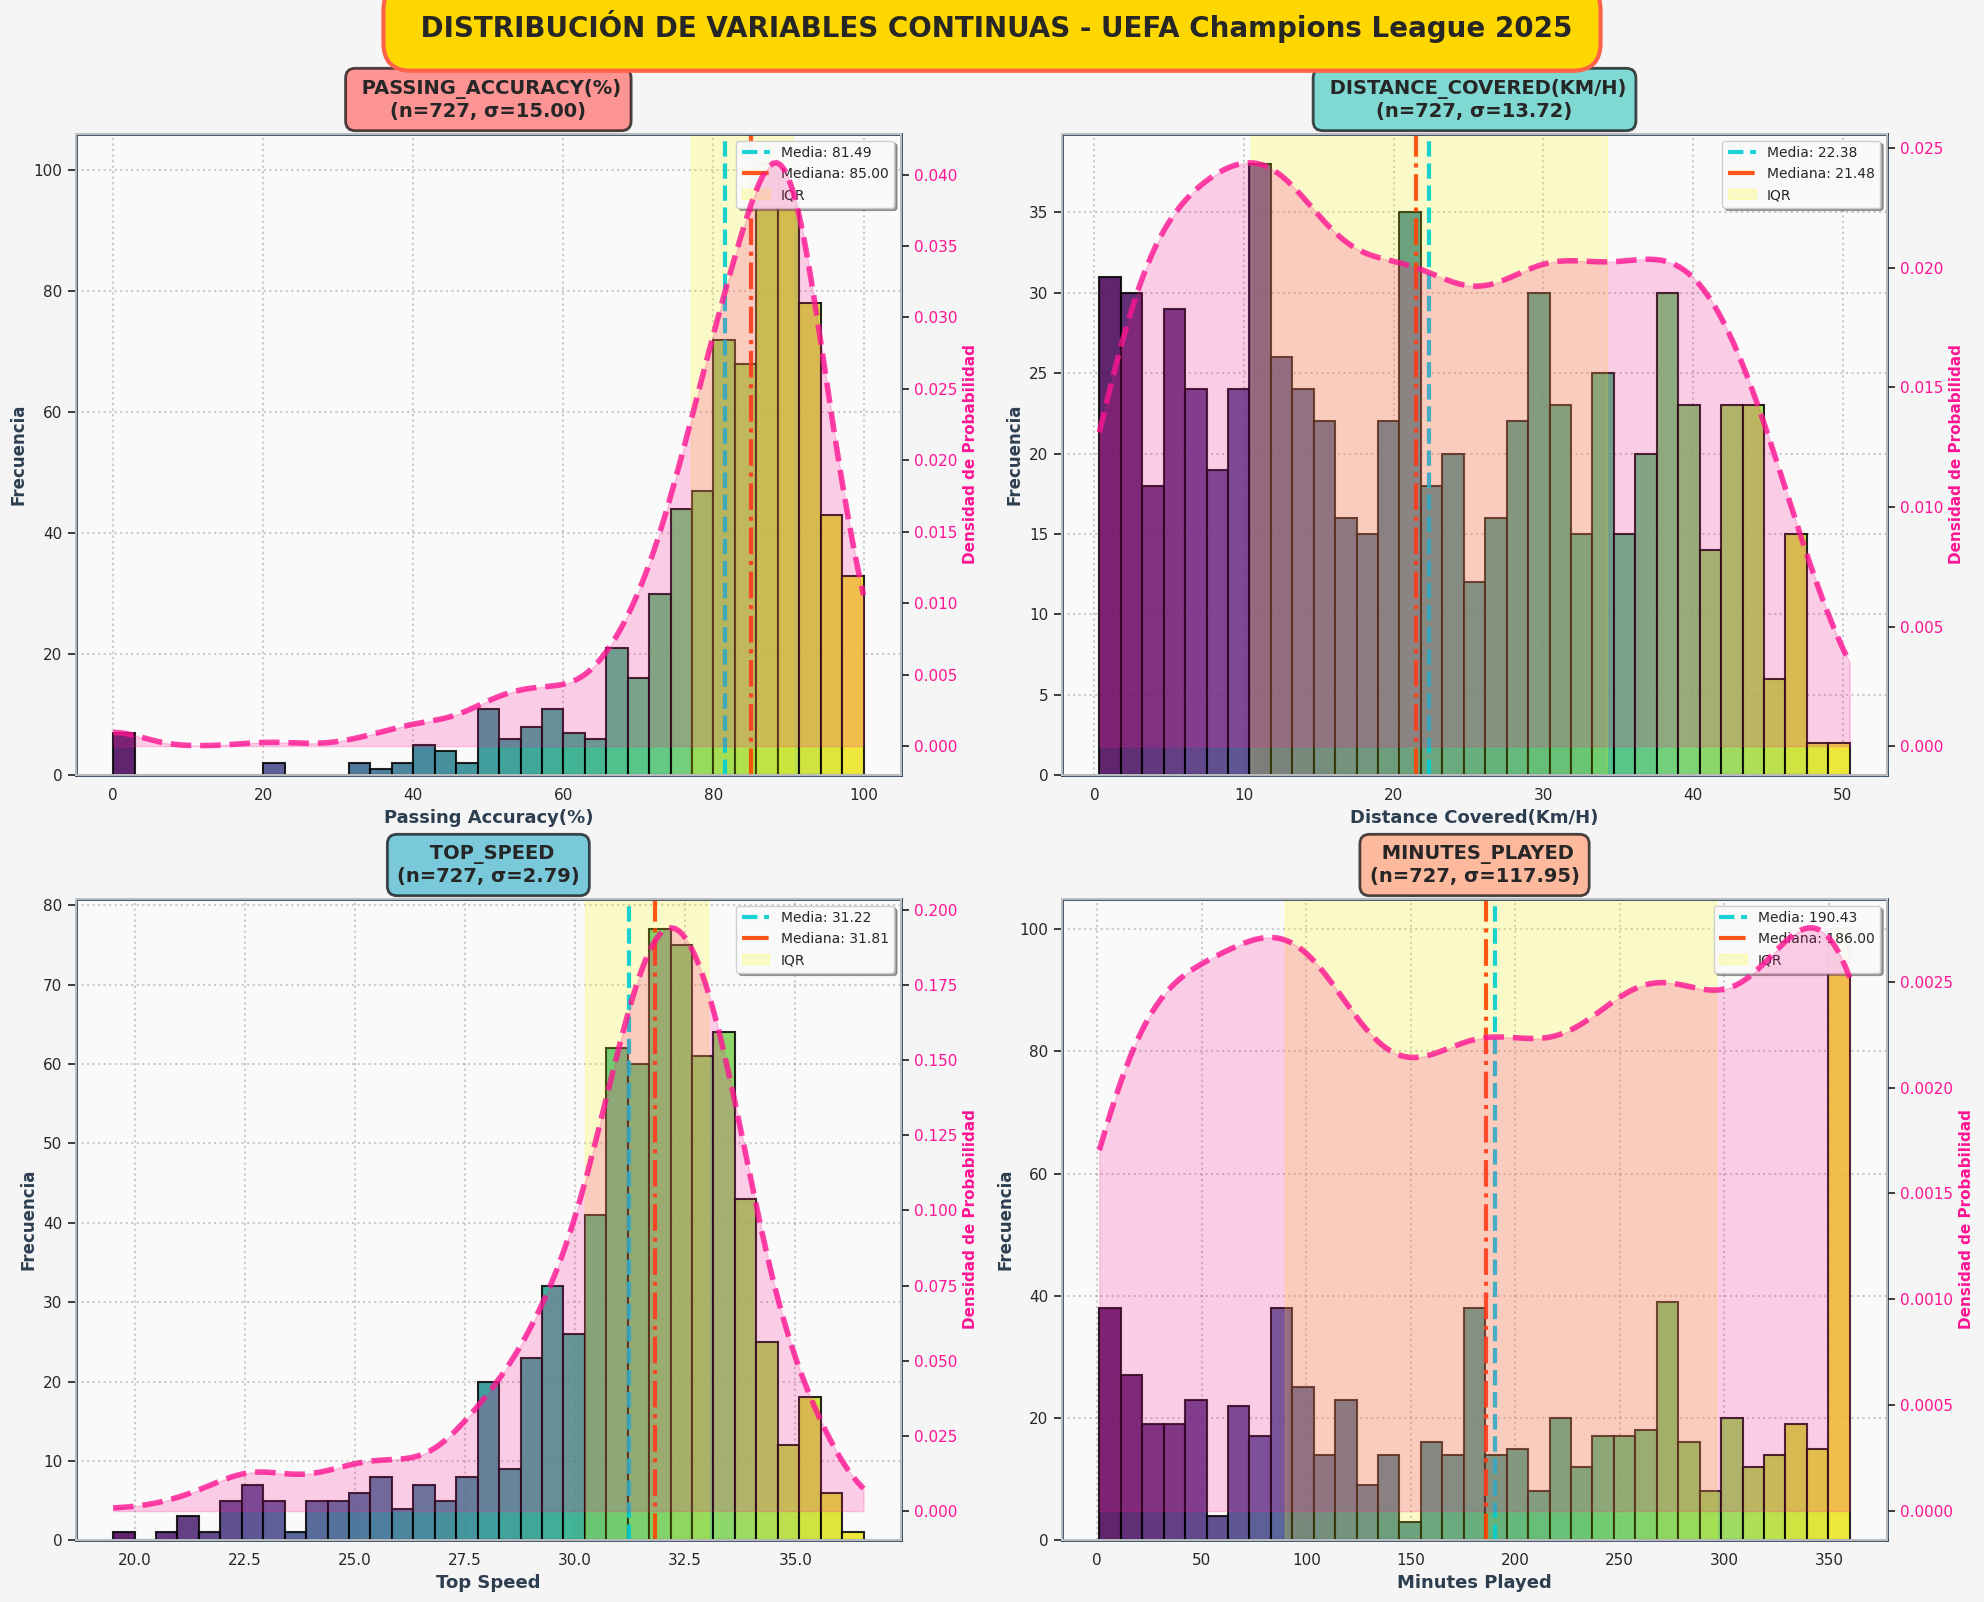

In [50]:
colores_principales = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.patch.set_facecolor('#F5F5F5')
fig.suptitle(' DISTRIBUCIÓN DE VARIABLES CONTINUAS - UEFA Champions League 2025',
             fontsize=20, fontweight='bold', y=1,
             bbox=dict(boxstyle='round,pad=1', facecolor='#FFD700', edgecolor='#FF6347', linewidth=3))

for idx, var in enumerate(vars_continuas_principales):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Datos limpios
    data = df[var].dropna()

    # Crear gradiente de colores
    n, bins, patches = ax.hist(data, bins=35, alpha=0.0)

    # Aplicar gradiente
    cmap = plt.cm.get_cmap('viridis')
    for i, patch in enumerate(patches):
        color = cmap(i / len(patches))
        patch.set_facecolor(color)
        patch.set_alpha(0.85)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

    # KDE
    ax2 = ax.twinx()
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 200)
    ax2.plot(x_range, kde(x_range), color='#FF1493', linewidth=4,
            alpha=0.8, label='Densidad', linestyle='--')
    ax2.fill_between(x_range, kde(x_range), alpha=0.2, color='#FF1493')
    ax2.set_ylabel('Densidad de Probabilidad', fontsize=11, color='#FF1493', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#FF1493')
    ax2.grid(False)

    # Estadísticos
    media = data.mean()
    mediana = data.median()
    moda = data.mode()[0] if len(data.mode()) > 0 else media

    ax.axvline(media, color='#00CED1', linestyle='--', linewidth=3,
              label=f'Media: {media:.2f}', alpha=0.9)
    ax.axvline(mediana, color='#FF4500', linestyle='-.', linewidth=3,
              label=f'Mediana: {mediana:.2f}', alpha=0.9)

    # Sombreado de áreas especiales
    q1, q3 = data.quantile([0.25, 0.75])
    ax.axvspan(q1, q3, alpha=0.2, color='yellow', label='IQR')

    # Personalización
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=13, fontweight='bold',
                 color='#2C3E50')
    ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold', color='#2C3E50')
    ax.set_title(f' {var.upper()}\n(n={len(data)}, σ={data.std():.2f})',
                fontsize=14, fontweight='bold', pad=12,
                bbox=dict(boxstyle='round,pad=0.5', facecolor=colores_principales[idx % 5],
                         edgecolor='black', linewidth=2, alpha=0.7))

    ax.legend(loc='upper right', frameon=True, shadow=True, fontsize=10,
             fancybox=True, framealpha=0.95)
    ax.grid(True, alpha=0.4, linestyle=':', linewidth=1.5, color='gray')
    ax.set_facecolor('#FAFAFA')

    # Añadir bordes
    for spine in ax.spines.values():
        spine.set_edgecolor('#34495E')
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()

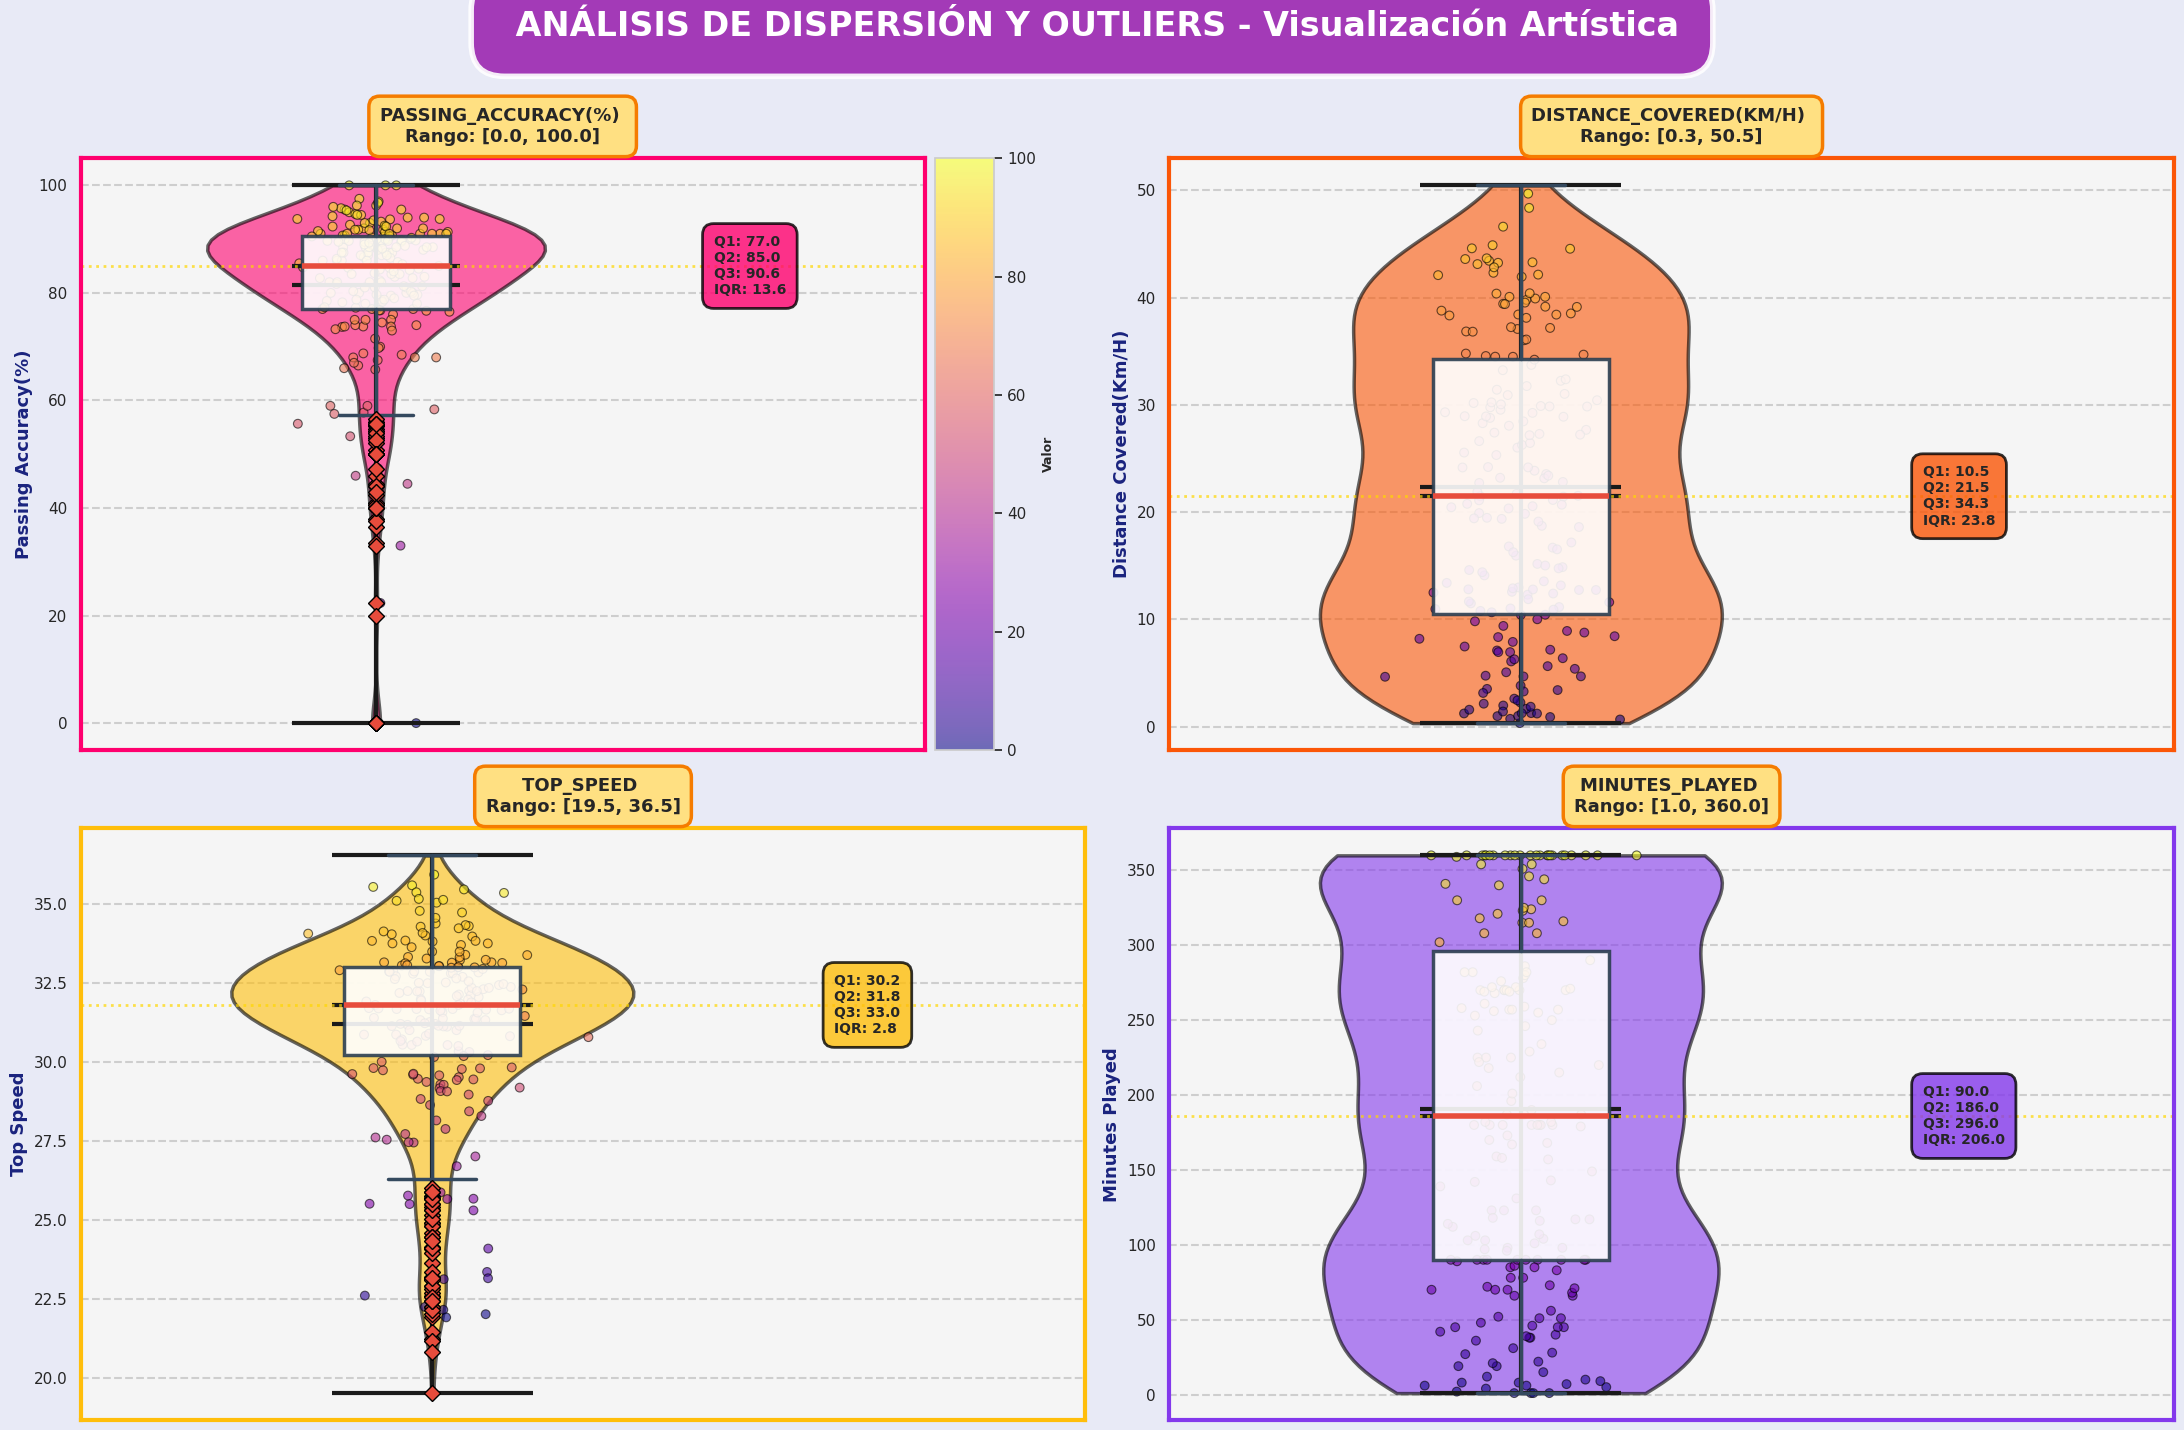

In [51]:
# ==============================================================================
# VISUALIZACIONES UNIVARIADAS
# ==============================================================================

fig, axes = plt.subplots(2, 2, figsize=(22, 14))
fig.patch.set_facecolor('#E8EAF6')
fig.suptitle(' ANÁLISIS DE DISPERSIÓN Y OUTLIERS - Visualización Artística',
             fontsize=24, fontweight='bold', y=1.02,
             bbox=dict(boxstyle='round,pad=1', facecolor='#9C27B0',
                      edgecolor='white', linewidth=4, alpha=0.9),
             color='white')

# Paleta única con colores
palette_neon = ['#FF006E', '#FB5607', '#FFBE0B', '#8338EC', '#3A86FF']

for idx, var in enumerate(vars_continuas_principales):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    data = df[var].dropna()

    # === VIOLINPLOT
    parts = ax.violinplot([data], positions=[0.5], showmeans=True, showmedians=True,
                          widths=0.8)

    # Personalizar cuerpo del violín
    for pc in parts['bodies']:
        pc.set_facecolor(palette_neon[idx % 5])
        pc.set_alpha(0.6)
        pc.set_edgecolor('black')
        pc.set_linewidth(2.5)

    # Personalizar líneas del violín
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
        if partname in parts:
            vp = parts[partname]
            vp.set_edgecolor('#1A1A1A')
            vp.set_linewidth(3)

    # === BOXPLOT SUPERPUESTO ===
    bp = ax.boxplot([data], positions=[0.5], widths=0.35, patch_artist=True,
                    boxprops=dict(facecolor='white', alpha=0.9, linewidth=2.5,
                                 edgecolor='#2C3E50'),
                    medianprops=dict(color='#E74C3C', linewidth=4),
                    whiskerprops=dict(linewidth=2.5, color='#34495E'),
                    capprops=dict(linewidth=2.5, color='#34495E'),
                    flierprops=dict(marker='D', markerfacecolor='#E74C3C',
                                   markersize=8, linestyle='none',
                                   markeredgecolor='black', markeredgewidth=1))

    # === SWARMPLOT (puntos individuales con jitter) ===
    y_sample = data.sample(min(200, len(data))).values
    x_jitter = np.random.normal(0.5, 0.08, size=len(y_sample))

    # Crear efecto degradado en los puntos
    scatter = ax.scatter(x_jitter, y_sample, alpha=0.6, s=40,
                        c=y_sample, cmap='plasma',
                        edgecolors='black', linewidth=0.8)

    # === ANOTACIONES ESTADÍSTICAS
    q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    # Crear cajas de texto
    textstr = f'Q1: {q1:.1f}\nQ2: {median:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}'
    props = dict(boxstyle='round,pad=0.8', facecolor=palette_neon[idx % 5],
                alpha=0.8, edgecolor='black', linewidth=2)
    ax.text(1.3, median, textstr, fontsize=10, verticalalignment='center',
            bbox=props, fontweight='bold')

    # === LÍNEAS DE REFERENCIA
    ax.axhline(median, color='#FFD700', linestyle=':', linewidth=2, alpha=0.7)

    ax.set_ylabel(var.replace('_', ' ').title(), fontsize=13, fontweight='bold',
                 color='#1A237E')
    ax.set_title(f'{var.upper()} \nRango: [{data.min():.1f}, {data.max():.1f}]',
                fontsize=13, fontweight='bold', pad=12,
                bbox=dict(boxstyle='round,pad=0.6', facecolor='#FFE082',
                         edgecolor='#F57C00', linewidth=2.5))

    ax.set_xticks([])
    ax.set_xlim(-0.2, 1.8)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5, color='#757575')
    ax.set_facecolor('#F5F5F5')

    # Añadir colorbar pequeño para el scatter
    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax, pad=0.01, aspect=10)
        cbar.set_label('Valor', fontsize=9, fontweight='bold')

    # Bordes artísticos
    for spine in ax.spines.values():
        spine.set_edgecolor(palette_neon[idx % 5])
        spine.set_linewidth(3)

plt.tight_layout()
plt.show()


## 🎨 Conclusiones — Análisis de Dispersión y Outliers (Visualización Artística)

Esta visualización combina **violinplots, boxplots y puntos individuales** para representar de forma simultánea la **distribución, densidad y presencia de outliers** en las variables continuas del dataset.  
El estilo artístico permite captar de manera intuitiva los contrastes entre regularidad y anomalía en el rendimiento de los jugadores.

---

### ⚽ `passing_accuracy(%)`
- La mayoría de los valores se concentran entre **77% y 91%**, con mediana en **85%**, lo que confirma la **alta precisión técnica promedio** en la competición.  
- Sin embargo, se observan **valores atípicos por debajo del 50%**, indicando jugadores con desempeño significativamente inferior (probablemente suplentes o roles defensivos con bajo volumen de pases).  
- La forma del violín muestra una **asimetría negativa leve**, reflejando que pocos jugadores logran precisiones cercanas al 100%.

---

### 🏃 `distance_covered(km/h)`
- Distribución **bimodal**, con densidades en torno a **10 km/h** y **34 km/h**, reflejando **dos perfiles de esfuerzo físico**: jugadores de baja participación y otros con alta movilidad (mediocampistas, extremos).  
- Los valores extremos por debajo de 5 km/h corresponden a **jugadores con minutos marginales o sin desplazamiento medido**.  
- El **IQR alto (≈23 km/h)** evidencia una gran heterogeneidad en la carga física.

---

### ⚡ `top_speed`
- Distribución **compacta y simétrica**, centrada en **31 km/h**, con una dispersión mínima (IQR ≈ 2.8).  
- Indica que la **velocidad punta es un atributo estable** entre jugadores de campo, con ligeras variaciones entre posiciones.  
- Los pocos valores por debajo de 25 km/h o superiores a 35 km/h son outliers claros que representan **jugadores con condiciones físicas excepcionales o limitadas**.

---

### ⏱️ `minutes_played`
- Muestra la **distribución más extendida y asimétrica del conjunto**, con un rango total de **1 a 360 minutos**.  
- La mediana (≈186 min) y la concentración superior cerca del máximo reflejan que **una parte del plantel disputa todos los minutos posibles**, mientras que otro grupo apenas participa.  
- Este patrón sugiere una **estratificación competitiva natural** entre titulares y suplentes, crucial para interpretar la dispersión en métricas derivadas (pases, velocidad, etc.).

---

### 💬 `Conclusión global:`  
Las gráficas confirman que las **métricas técnicas (precisión, velocidad)** mantienen una dispersión controlada, mientras que las **métricas de carga (minutos, distancia)** exhiben una alta variabilidad y presencia de valores extremos.  
Esto sugiere que los **outliers detectados posteriormente** por métodos estadísticos o de Machine Learning **no necesariamente son errores**, sino reflejos de **roles tácticos o niveles de participación distintos** dentro del torneo.

---

📈 En resumen:
- **Passing Accuracy →** alta consistencia técnica.  
- **Distance Covered →** dualidad táctica y esfuerzo físico desigual.  
- **Top Speed →** estabilidad atlética general.  
- **Minutes Played →** variable estructural de mayor impacto y dispersión.


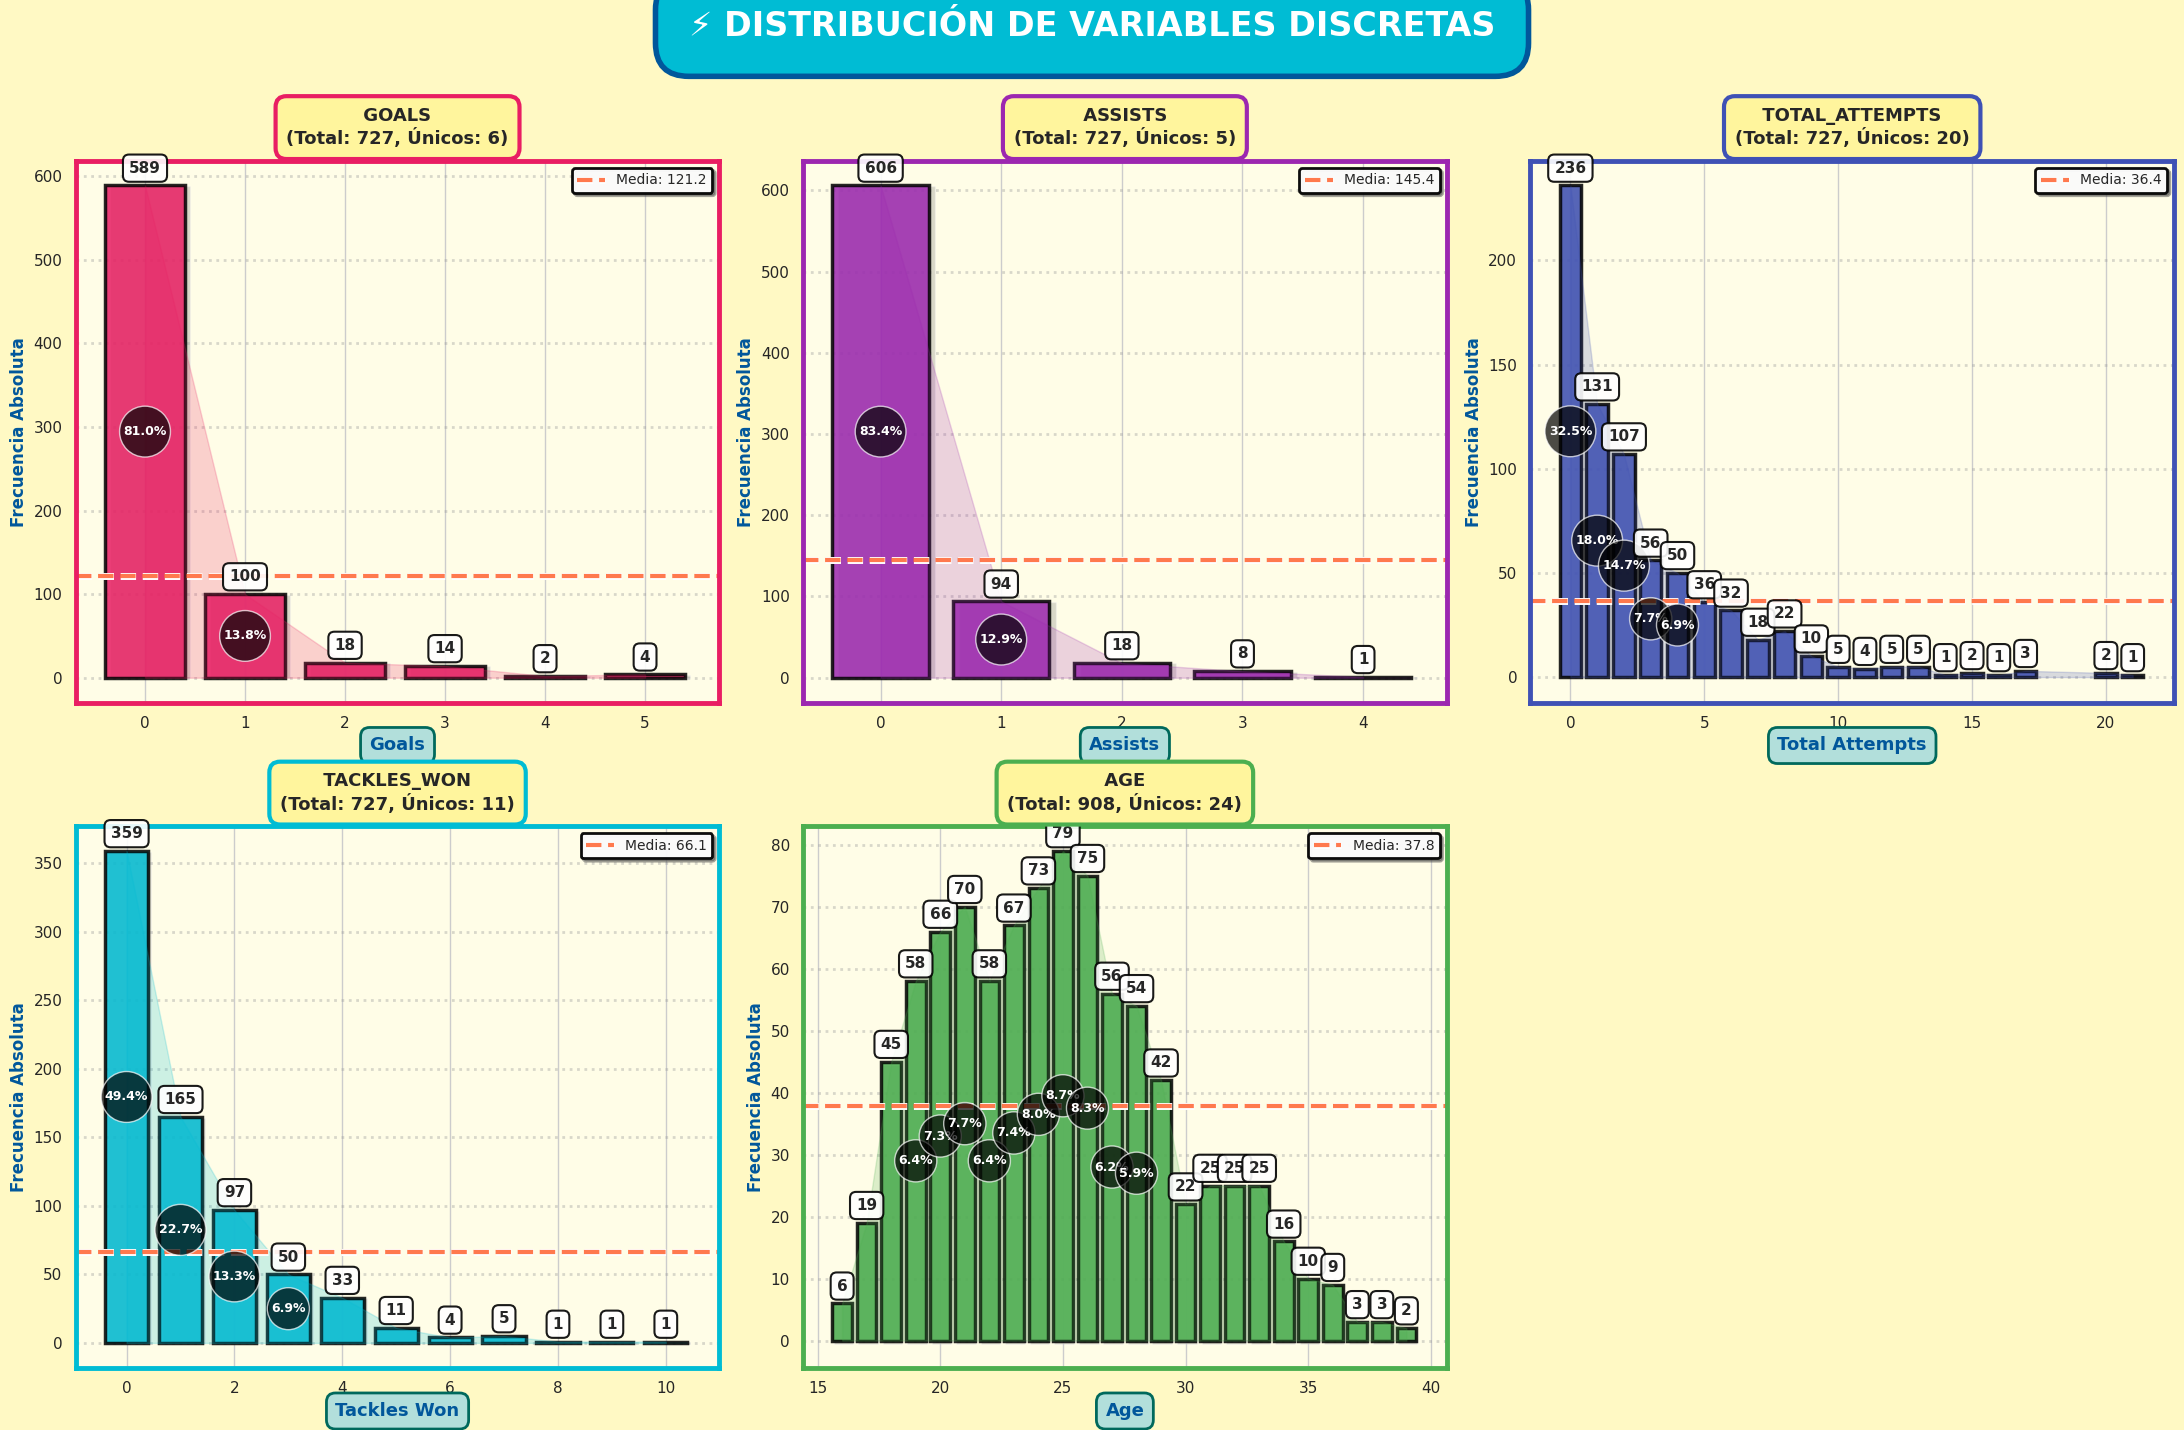

In [52]:
# ==============================================================================
# VISUALIZACIONES UNIVARIADA
# ==============================================================================

fig, axes = plt.subplots(2, 3, figsize=(22, 14))
fig.patch.set_facecolor('#FFF9C4')
fig.suptitle('⚡ DISTRIBUCIÓN DE VARIABLES DISCRETAS',
             fontsize=24, fontweight='bold', y=1.02,
             bbox=dict(boxstyle='round,pad=1', facecolor='#00BCD4',
                      edgecolor='#01579B', linewidth=4),
             color='white')


colores_espectaculares = ['#E91E63', '#9C27B0', '#3F51B5', '#00BCD4', '#4CAF50']

for idx, var in enumerate(vars_discretas_principales):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Contar frecuencias
    value_counts = df[var].value_counts().sort_index()

    # === CREAR BARRAS CON EFECTOS 3D
    bars = ax.bar(value_counts.index, value_counts.values,
                  color=colores_espectaculares[idx % 5], alpha=0.85,
                  edgecolor='black', linewidth=2.5)

    # Aplicar gradiente vertical a cada barra
    for i, bar in enumerate(bars):
        # Degradado de color
        height = bar.get_height()
        gradient = np.linspace(0.4, 1.0, int(height) + 1)
        bar.set_facecolor(colores_espectaculares[idx % 5])

        # Efecto de sombra 3D
        shadow = plt.Rectangle((bar.get_x() + 0.05, -0.5),
                              bar.get_width(), height,
                              facecolor='gray', alpha=0.3, zorder=0)
        ax.add_patch(shadow)

    # === VALORES EN LAS BARRAS
    for i, (x, y) in enumerate(zip(value_counts.index, value_counts.values)):
        if y > 0:
            # Valor numérico
            ax.text(x, y + value_counts.max() * 0.02, str(int(y)),
                   ha='center', va='bottom', fontsize=11, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                            edgecolor='black', linewidth=1.5, alpha=0.9))

            # Porcentaje
            pct = (y / value_counts.sum()) * 100
            if pct > 5:  # Solo mostrar si es > 5%
                ax.text(x, y/2, f'{pct:.1f}%', ha='center', va='center',
                       fontsize=9, fontweight='bold', color='white',
                       bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))

    # === LÍNEAS DE REFERENCIA
    media = value_counts.mean()
    ax.axhline(media, color='#FF5722', linestyle='--', linewidth=3,
              alpha=0.8, label=f'Media: {media:.1f}',
              path_effects=[path_effects.withStroke(linewidth=5,
                           foreground='white')])

    # === ÁREA SOMBREADA
    ax.fill_between(value_counts.index, 0, value_counts.values,
                    alpha=0.2, color=colores_espectaculares[idx % 5])

    # === PERSONALIZACIÓN
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=13, fontweight='bold',
                 color='#01579B',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='#B2DFDB',
                          edgecolor='#00695C', linewidth=2))
    ax.set_ylabel('Frecuencia Absoluta', fontsize=12, fontweight='bold', color='#01579B')
    ax.set_title(f' {var.upper()} \n(Total: {value_counts.sum()}, Únicos: {len(value_counts)})',
                fontsize=13, fontweight='bold', pad=12,
                bbox=dict(boxstyle='round,pad=0.6', facecolor='#FFF59D',
                         edgecolor=colores_espectaculares[idx % 5], linewidth=3))

    legend = ax.legend(loc='upper right', frameon=True, shadow=True, fontsize=10,
                      fancybox=True, framealpha=0.95, edgecolor='black')
    legend.get_frame().set_linewidth(2)
    ax.grid(True, alpha=0.4, axis='y', linestyle=':', linewidth=2, color='#9E9E9E')
    ax.set_facecolor('#FFFDE7')

    # Bordes coloridos
    for spine in ax.spines.values():
        spine.set_edgecolor(colores_espectaculares[idx % 5])
        spine.set_linewidth(3.5)

# Ocultar último eje
if len(vars_discretas_principales) < 6:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 📊 Conclusiones — Distribución de Variables Discretas

Esta visualización presenta las frecuencias absolutas de las variables discretas principales, permitiendo identificar **asimetrías, concentración de valores y dispersión en los eventos deportivos**.  
En conjunto, los histogramas reflejan un patrón común en el fútbol de élite: **pocos jugadores concentran la mayoría de las acciones destacadas**, mientras que la mayoría mantiene registros bajos o nulos.

---

### ⚽ `Goals`
- El **81% de los jugadores no anotó goles**, mostrando una fuerte **asimetría a la izquierda**.  
- Los pocos jugadores con 3 o más goles representan los **referentes ofensivos** del torneo.  
- La distribución confirma la naturaleza **altamente concentrada del rendimiento goleador**, típica de sistemas donde pocos asumen la finalización.

---

### 🎯 `Assists`
- El **83% no registró asistencias**, con un patrón muy similar al de los goles.  
- Los valores altos (3–4 asistencias) son casos aislados de **jugadores creativos o mediapuntas**.  
- La dispersión mínima sugiere que la **generación de juego** también está concentrada en unos pocos futbolistas.

---

### 🔫 `Total Attempts`
- A diferencia de las dos anteriores, esta variable muestra una **distribución más extendida**, aunque sigue siendo **asimétrica positiva**.  
- Los valores predominantes (0–4 intentos) representan la mayoría, pero algunos jugadores superan los **15 o más intentos**, destacando su protagonismo ofensivo.  
- Este contraste visual evidencia la **desigualdad en la participación ofensiva**, con roles bien diferenciados entre finalizadores y asistentes.

---

### 🛡️ `Tackles Won`
- Exhibe una distribución más **progresiva**, con picos en 0–2 y una caída gradual hasta el máximo de 10.  
- Esto refleja la **naturaleza situacional de las acciones defensivas**, dependiente del rol táctico.  
- La presencia de jugadores con más de 6 tackles ganados indica **especialización defensiva o alta carga de recuperación**.

---

### 👤 `Age`
- A diferencia de las demás, presenta una **distribución más equilibrada**, con una forma **aproximadamente normal** centrada en los **24–25 años**.  
- Esto refuerza que la mayoría de los futbolistas se encuentra en su **etapa de máximo rendimiento físico y técnico**.  
- Las colas en ambos extremos (sub-18 y mayores de 35) son minoritarias, pero **aportan diversidad etaria** al conjunto analizado.

---

💬 **Conclusión global:**
- Las métricas discretas (goles, asistencias, intentos, tackles) exhiben **alta concentración en valores bajos**, lo que sugiere **pocos protagonistas y muchos jugadores con funciones de apoyo**.  
- En cambio, la variable `age` muestra un **perfil de distribución más uniforme**, lo que refuerza la idea de un grupo competitivo homogéneo en edad, pero heterogéneo en rendimiento.  
- Este contraste será clave al analizar los **outliers**: en estas variables discretas, los valores extremos reflejan **rendimientos sobresalientes reales**, no errores de medición.

---

📈 En síntesis:
- **Goles y asistencias →** extremadamente asimétricas, con pocos líderes de impacto.  
- **Intentos y tackles →** más dispersas, reflejan participación táctica diferenciada.  
- **Edad →** variable estable, base estructural del conjunto de análisis.


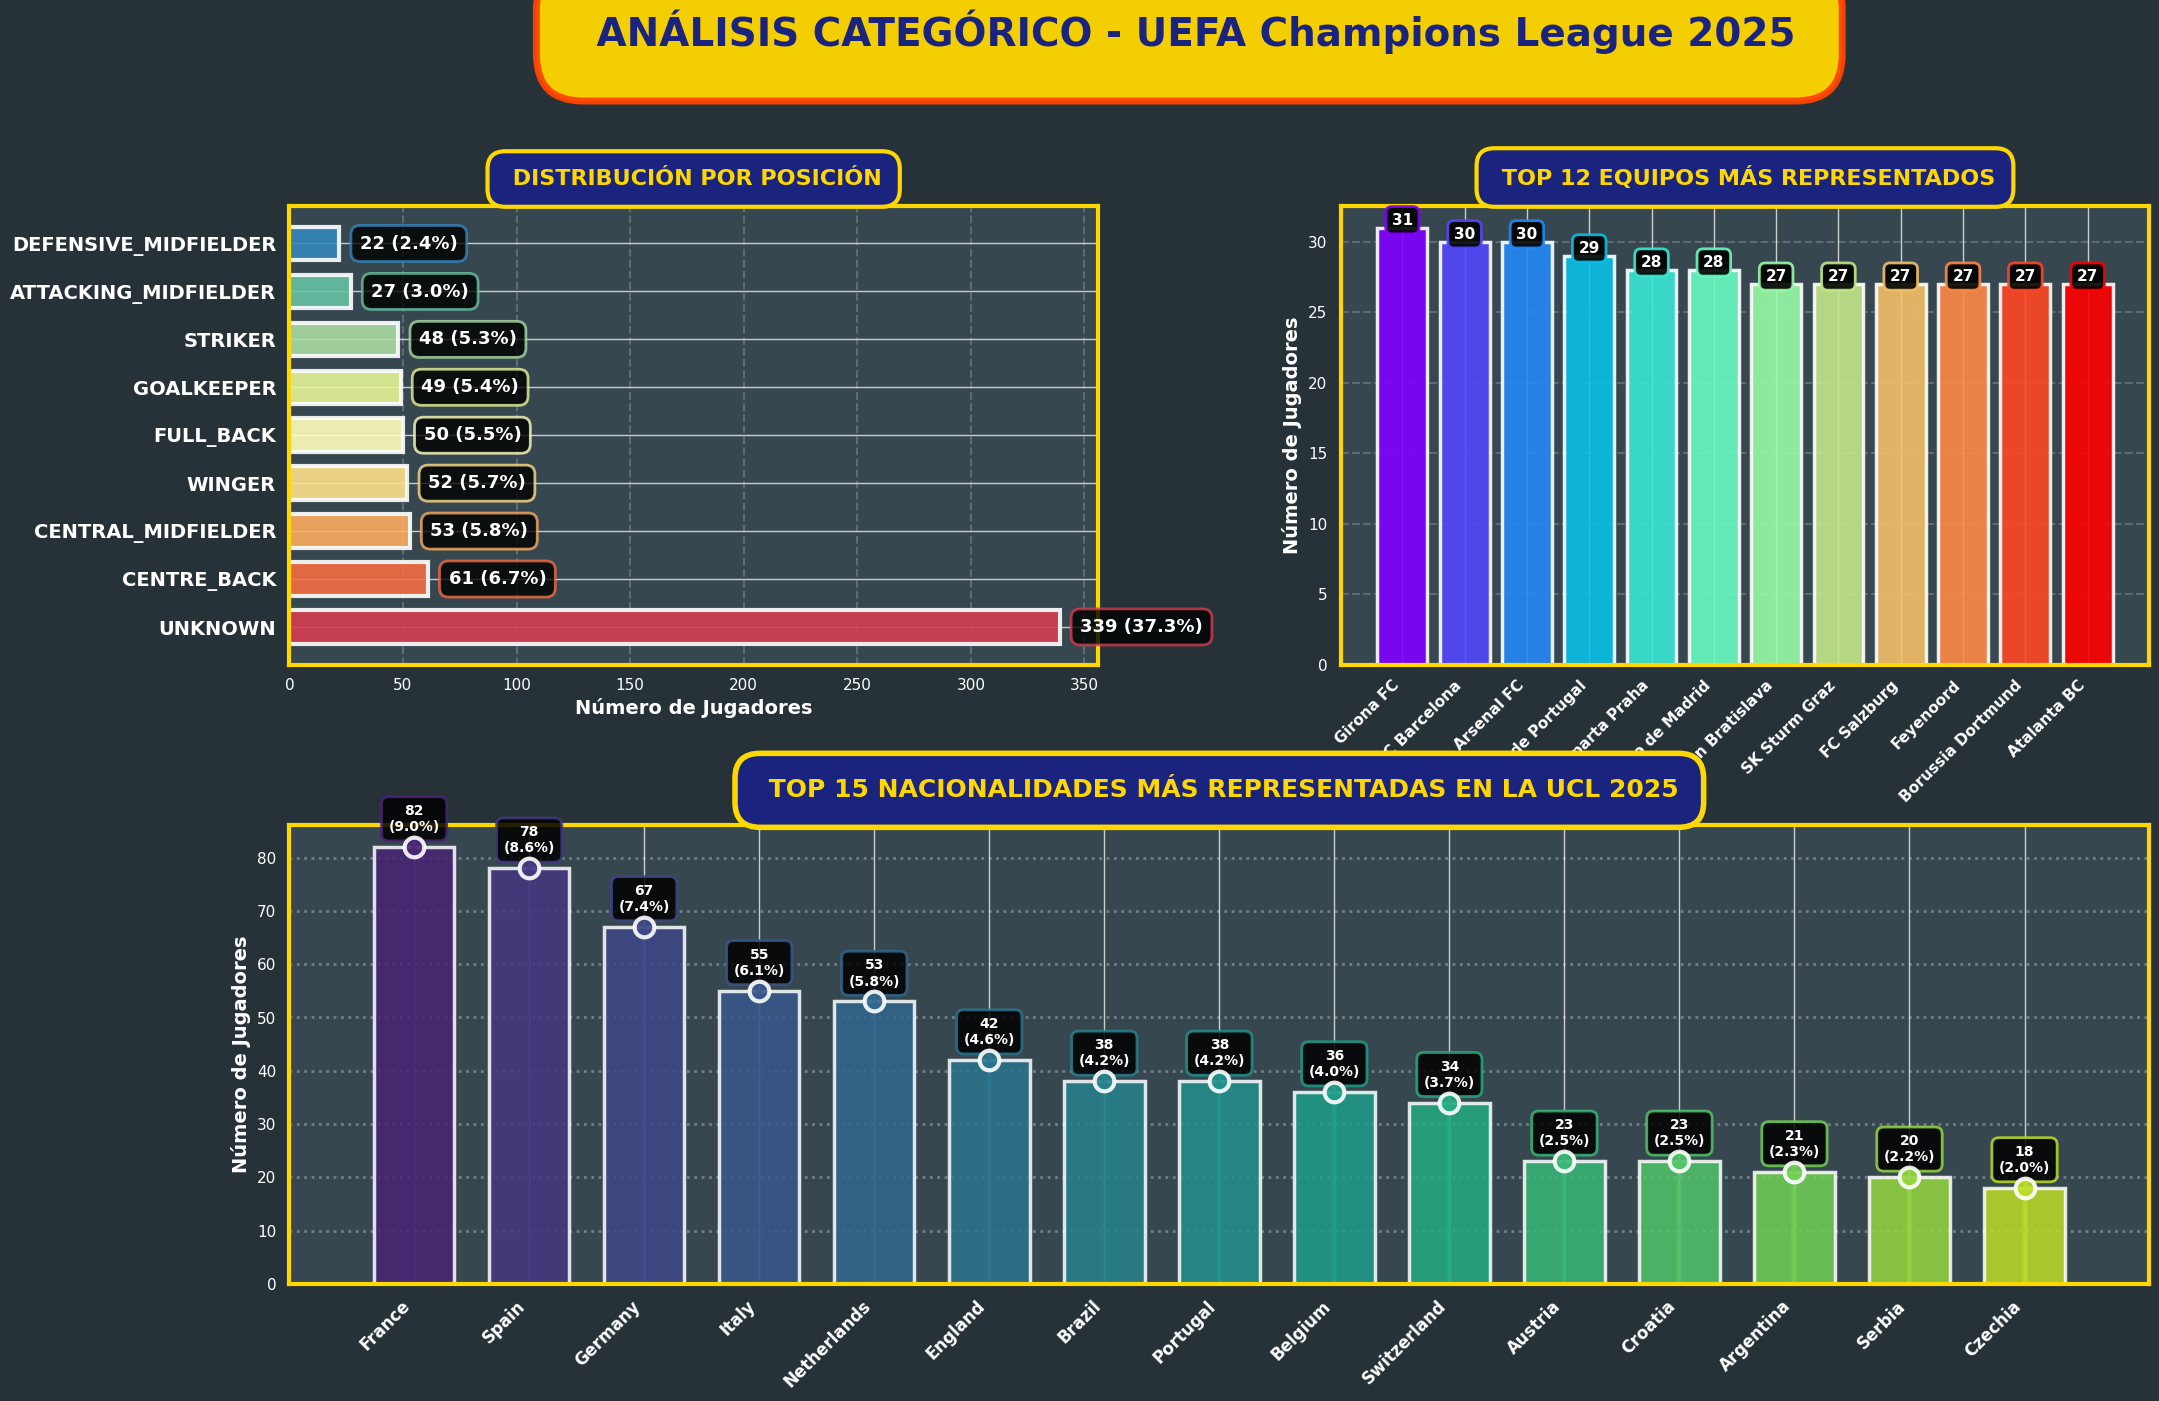

In [53]:
# ==============================================================================
# VISUALIZACIONES CATEGÓRICAS
# ==============================================================================

fig = plt.figure(figsize=(24, 14))
fig.patch.set_facecolor('#263238')
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Título
fig.suptitle(' ANÁLISIS CATEGÓRICO - UEFA Champions League 2025',
             fontsize=28, fontweight='bold', y=1.02,
             bbox=dict(boxstyle='round,pad=1.2', facecolor='#FFD700',
                      edgecolor='#FF4500', linewidth=5, alpha=0.95),
             color='#1A237E')


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor('#37474F')

position_counts = df['position'].value_counts()
colors_pos = plt.cm.Spectral(np.linspace(0.1, 0.9, len(position_counts)))

bars1 = ax1.barh(range(len(position_counts)), position_counts.values,
                 color=colors_pos, alpha=0.9, edgecolor='white', linewidth=3,
                 height=0.7)

# Efecto
for i, (bar, val) in enumerate(zip(bars1, position_counts.values)):
    # Valor con estilo
    pct = (val / len(df)) * 100
    ax1.text(val + len(df)*0.01, i, f'{int(val)} ({pct:.1f}%)',
            va='center', ha='left', fontsize=13, fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='black',
                     edgecolor=colors_pos[i], linewidth=2, alpha=0.8))

ax1.set_yticks(range(len(position_counts)))
ax1.set_yticklabels(position_counts.index, fontsize=14, fontweight='bold', color='white')
ax1.set_xlabel('Número de Jugadores', fontsize=14, fontweight='bold', color='white')
ax1.set_title(' DISTRIBUCIÓN POR POSICIÓN', fontsize=16, fontweight='bold',
             pad=15, color='#FFD700',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#1A237E',
                      edgecolor='#FFD700', linewidth=3))
ax1.grid(True, alpha=0.2, axis='x', linestyle='--', color='white', linewidth=1.5)
ax1.tick_params(colors='white', which='both')
for spine in ax1.spines.values():
    spine.set_edgecolor('#FFD700')
    spine.set_linewidth(3)


ax2 = fig.add_subplot(gs[0, 1])
ax2.set_facecolor('#37474F')

team_counts = df['team'].value_counts().head(12)
colors_team = plt.cm.rainbow(np.linspace(0, 1, len(team_counts)))

bars2 = ax2.bar(range(len(team_counts)), team_counts.values,
               color=colors_team, alpha=0.9, edgecolor='white', linewidth=2.5,
               width=0.8)

# Degradado vertical en cada barra
for i, bar in enumerate(bars2):
    bar.set_facecolor(colors_team[i])

    # Agregar valor encima
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='black',
                     edgecolor=colors_team[i], linewidth=2, alpha=0.9))

ax2.set_xticks(range(len(team_counts)))
ax2.set_xticklabels(team_counts.index, rotation=45, ha='right',
                    fontsize=11, fontweight='bold', color='white')
ax2.set_ylabel('Número de Jugadores', fontsize=14, fontweight='bold', color='white')
ax2.set_title(' TOP 12 EQUIPOS MÁS REPRESENTADOS', fontsize=16, fontweight='bold',
             pad=15, color='#FFD700',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#1A237E',
                      edgecolor='#FFD700', linewidth=3))
ax2.grid(True, alpha=0.2, axis='y', linestyle='--', color='white', linewidth=1.5)
ax2.tick_params(colors='white', which='both')
for spine in ax2.spines.values():
    spine.set_edgecolor('#FFD700')
    spine.set_linewidth(3)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_facecolor('#37474F')

nationality_counts = df['nationality'].value_counts().head(15)
colors_nat = plt.cm.viridis(np.linspace(0.1, 0.9, len(nationality_counts)))

# Crear barras
x_pos = np.arange(len(nationality_counts))
bars3 = ax3.bar(x_pos, nationality_counts.values,
               color=colors_nat, alpha=0.85, edgecolor='white', linewidth=2.5,
               width=0.7)

# Añadir líneas verticales
for i, (x, y) in enumerate(zip(x_pos, nationality_counts.values)):
    ax3.plot([x, x], [0, y], color=colors_nat[i], linewidth=4, alpha=0.6)

    # Puntos en la cima
    ax3.scatter(x, y, s=200, color=colors_nat[i], edgecolor='white',
               linewidth=3, zorder=5, alpha=0.9)

    # Valores y porcentajes
    pct = (y / len(df)) * 100
    ax3.text(x, y + nationality_counts.max() * 0.03,
            f'{int(y)}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='black',
                     edgecolor=colors_nat[i], linewidth=2, alpha=0.85))

ax3.set_xticks(x_pos)
ax3.set_xticklabels(nationality_counts.index, rotation=45, ha='right',
                    fontsize=12, fontweight='bold', color='white')
ax3.set_ylabel('Número de Jugadores', fontsize=14, fontweight='bold', color='white')
ax3.set_title(' TOP 15 NACIONALIDADES MÁS REPRESENTADAS EN LA UCL 2025',
             fontsize=18, fontweight='bold', pad=20, color='#FFD700',
             bbox=dict(boxstyle='round,pad=1', facecolor='#1A237E',
                      edgecolor='#FFD700', linewidth=4))
ax3.grid(True, alpha=0.3, axis='y', linestyle=':', color='white', linewidth=2)
ax3.tick_params(colors='white', which='both')
for spine in ax3.spines.values():
    spine.set_edgecolor('#FFD700')
    spine.set_linewidth(3)

plt.show()


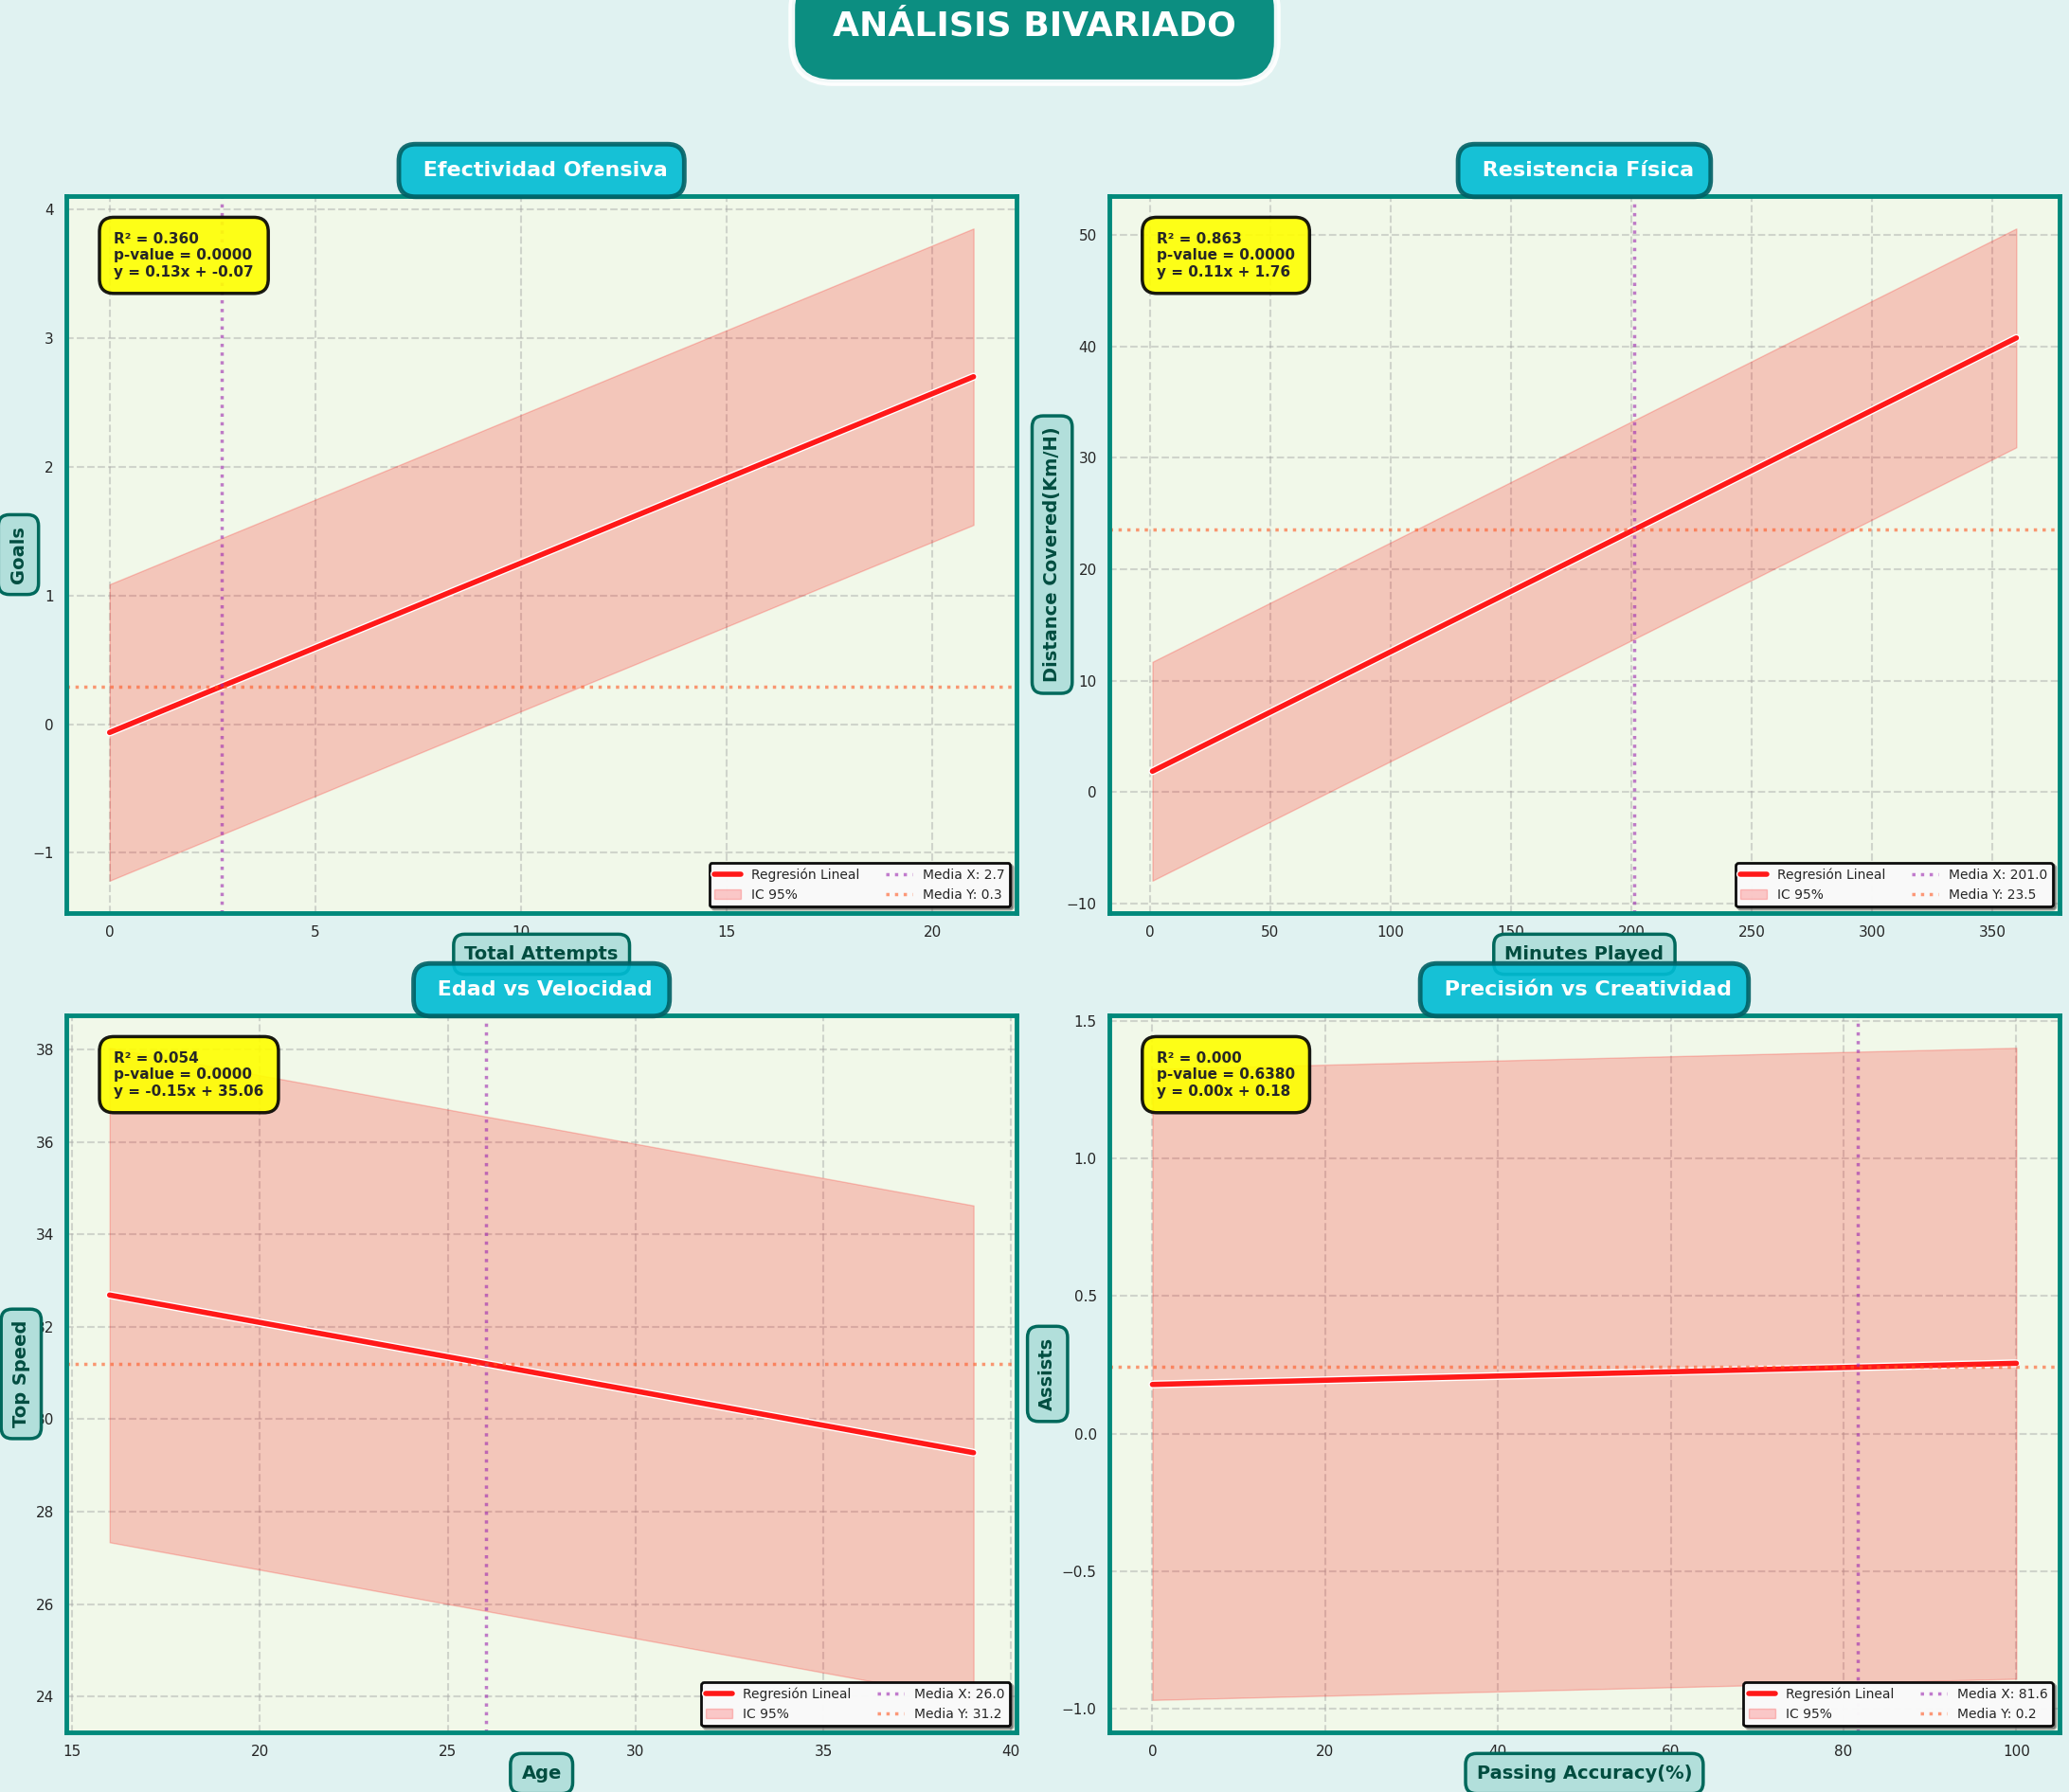

In [54]:
# ==============================================================================
# VISUALIZACIONES BIVARIADAS - SCATTER PLOTS CON REGRESIÓN
# ==============================================================================

fig, axes = plt.subplots(2, 2, figsize=(22, 18))
fig.patch.set_facecolor('#E0F2F1')
fig.suptitle('ANÁLISIS BIVARIADO',
             fontsize=26, fontweight='bold', y=1.05,
             bbox=dict(boxstyle='round,pad=1.2', facecolor='#00897B',
                      edgecolor='white', linewidth=5, alpha=0.95),
             color='white')

# Relaciones interesantes
relaciones = [
    ('total_attempts', 'goals', ' Efectividad Ofensiva'),
    ('minutes_played', 'distance_covered(km/h)', ' Resistencia Física'),
    ('age', 'top_speed', ' Edad vs Velocidad'),
    ('passing_accuracy(%)', 'assists', ' Precisión vs Creatividad')
]

# Paleta de colores por posición
position_colors = {
    'GK': '#E91E63',  # Rosa intenso
    'DF': '#2196F3',  # Azul brillante
    'MF': '#4CAF50',  # Verde vibrante
    'FW': '#FF9800'   # Naranja energético
}

for idx, (var_x, var_y, titulo) in enumerate(relaciones):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.set_facecolor('#F1F8E9')

    # Limpiar datos
    data_plot = df[[var_x, var_y, 'position']].dropna()

    # === SCATTER PLOT CON EFECTOS
    for position, color in position_colors.items():
        mask = data_plot['position'] == position
        if mask.any():
            # Scatter principal
            scatter = ax.scatter(data_plot.loc[mask, var_x],
                               data_plot.loc[mask, var_y],
                               c=color, label=position, alpha=0.7, s=120,
                               edgecolors='black', linewidth=1.5,
                               marker='o')

            ax.scatter(data_plot.loc[mask, var_x],
                      data_plot.loc[mask, var_y],
                      c=color, alpha=0.2, s=250,
                      edgecolors='none', linewidth=0)

    # === LÍNEA DE REGRESIÓN CON INTERVALO DE CONFIANZA
    if len(data_plot) > 1:
        from scipy import stats as sp_stats

        x_data = data_plot[var_x].values
        y_data = data_plot[var_y].values

        # Regresión lineal
        slope, intercept, r_value, p_value, std_err = sp_stats.linregress(x_data, y_data)
        x_line = np.linspace(x_data.min(), x_data.max(), 100)
        y_line = slope * x_line + intercept

        # Línea de regresión principal
        ax.plot(x_line, y_line, "r-", linewidth=4, alpha=0.9,
               label='Regresión Lineal',
               path_effects=[path_effects.withStroke(
                   linewidth=6, foreground='white')])

        # Intervalo de confianza
        from sklearn.metrics import r2_score
        y_pred = slope * x_data + intercept
        residuals = y_data - y_pred
        std_residuals = np.std(residuals)

        y_upper = y_line + 1.96 * std_residuals
        y_lower = y_line - 1.96 * std_residuals
        ax.fill_between(x_line, y_lower, y_upper, alpha=0.2, color='red',
                       label='IC 95%')

        # Calcular R² y mostrar
        r2 = r_value**2

        # Caja de estadísticos
        stats_text = f'R² = {r2:.3f}\np-value = {p_value:.4f}\ny = {slope:.2f}x + {intercept:.2f}'
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
               fontsize=11, verticalalignment='top', fontweight='bold',
               bbox=dict(boxstyle='round,pad=1', facecolor='yellow',
                        edgecolor='black', linewidth=2.5, alpha=0.9))

    # === LÍNEAS DE MEDIA
    mean_x = data_plot[var_x].mean()
    mean_y = data_plot[var_y].mean()
    ax.axvline(mean_x, color='#9C27B0', linestyle=':', linewidth=2.5,
              alpha=0.6, label=f'Media X: {mean_x:.1f}')
    ax.axhline(mean_y, color='#FF5722', linestyle=':', linewidth=2.5,
              alpha=0.6, label=f'Media Y: {mean_y:.1f}')

    # === PERSONALIZACIÓN
    ax.set_xlabel(var_x.replace('_', ' ').title(), fontsize=14, fontweight='bold',
                 color='#004D40',
                 bbox=dict(boxstyle='round,pad=0.6', facecolor='#B2DFDB',
                          edgecolor='#00695C', linewidth=2.5))
    ax.set_ylabel(var_y.replace('_', ' ').title(), fontsize=14, fontweight='bold',
                 color='#004D40',
                 bbox=dict(boxstyle='round,pad=0.6', facecolor='#B2DFDB',
                          edgecolor='#00695C', linewidth=2.5))
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=15,
                bbox=dict(boxstyle='round,pad=0.8', facecolor='#00BCD4',
                         edgecolor='#006064', linewidth=3.5, alpha=0.9),
                color='white')

    legend = ax.legend(loc='lower right', frameon=True, shadow=True, fontsize=10,
                      fancybox=True, framealpha=0.95, edgecolor='black', ncol=2)
    legend.get_frame().set_linewidth(2)
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=1.5, color='#9E9E9E')

    # Bordes coloridos
    for spine in ax.spines.values():
        spine.set_edgecolor('#00897B')
        spine.set_linewidth(3.5)

plt.tight_layout()
plt.show()


## 🔗 Conclusiones — Análisis Bivariado (Relaciones entre Variables Clave)

Este bloque explora **relaciones lineales entre pares de variables representativas** del rendimiento futbolístico.  
Cada diagrama muestra la tendencia general (línea roja), el intervalo de confianza al 95% (área rosada) y los valores medios de cada variable.  
El objetivo es detectar **patrones funcionales entre desempeño técnico, físico y demográfico.**

---

### ⚽ Efectividad Ofensiva → *(Total Attempts vs Goals)*
- **R² = 0.36 | p < 0.001**
- Existe una **relación positiva y significativa** entre la cantidad de intentos y los goles convertidos.  
- Aunque el coeficiente no es extremadamente alto, refleja que **a mayor frecuencia de remates, mayor probabilidad de anotar**, lo cual es consistente con la lógica del rendimiento ofensivo.  
- La dispersión moderada sugiere que **la eficiencia varía entre jugadores**, influenciada por factores como posición o calidad técnica.

📊 *Conclusión:* la productividad goleadora depende parcialmente del volumen ofensivo, pero **no todos los intentos se traducen en efectividad real.**

---

### 🏃 Resistencia Física → *(Minutes Played vs Distance Covered)*
- **R² = 0.86 | p < 0.001**
- Correlación **muy fuerte y positiva**, indicando que los jugadores con más minutos acumulados recorren distancias significativamente mayores.  
- El patrón lineal casi perfecto evidencia una **consistencia fisiológica y táctica**: más tiempo en cancha implica más carga física.  
- No se observan desviaciones importantes, lo que sugiere homogeneidad en la intensidad promedio de esfuerzo.

📊 *Conclusión:* el rendimiento físico está **directamente condicionado por la participación activa**, reflejando una tendencia natural del tiempo-juego.

---

### ⚡ Edad vs Velocidad → *(Age vs Top Speed)*
- **R² = 0.05 | p < 0.001**
- Correlación **débil pero negativa**: a medida que aumenta la edad, la velocidad punta tiende a disminuir ligeramente.  
- El bajo R² indica que **otros factores (posición, preparación física o estilo de juego)** influyen más en la velocidad que la edad en sí.  
- Se confirma una tendencia leve al descenso, compatible con la **pérdida gradual de explosividad en jugadores veteranos.**

📊 *Conclusión:* la edad impacta **moderadamente la velocidad**, pero la preparación individual puede compensar este efecto.

---

### 🎯 Precisión vs Creatividad → *(Passing Accuracy vs Assists)*
- **R² ≈ 0.00 | p = 0.64**
- No se observa correlación significativa entre la precisión de pase y el número de asistencias.  
- Esto sugiere que **la creatividad ofensiva no depende solo de la precisión técnica**, sino también de la **visión de juego, posición táctica y contexto del partido.**  
- Los valores dispersos confirman que jugadores con alta precisión no necesariamente producen más asistencias.

📊 *Conclusión:* la creatividad es un rasgo **más cualitativo que cuantitativo**, donde la precisión es necesaria, pero no suficiente.

---

### 💬 Síntesis General
- Las relaciones entre variables **siguen patrones coherentes con el rendimiento deportivo real**:  
  - **Intentos → Goles** (efectividad táctica)  
  - **Minutos → Distancia** (carga física)  
  - **Edad → Velocidad** (declive natural)  
  - **Precisión → Asistencias** (baja dependencia)
- Las correlaciones más fuertes se asocian a **factores de esfuerzo acumulado (minutos, distancia)**, mientras que las más débiles reflejan **dimensiones creativas o estratégicas más complejas.**

📈 En conjunto, el análisis bivariado revela que **el rendimiento físico y la participación explican mejor la variabilidad observada**, mientras que las métricas técnicas o cognitivas requieren análisis multivariado más profundo.

---


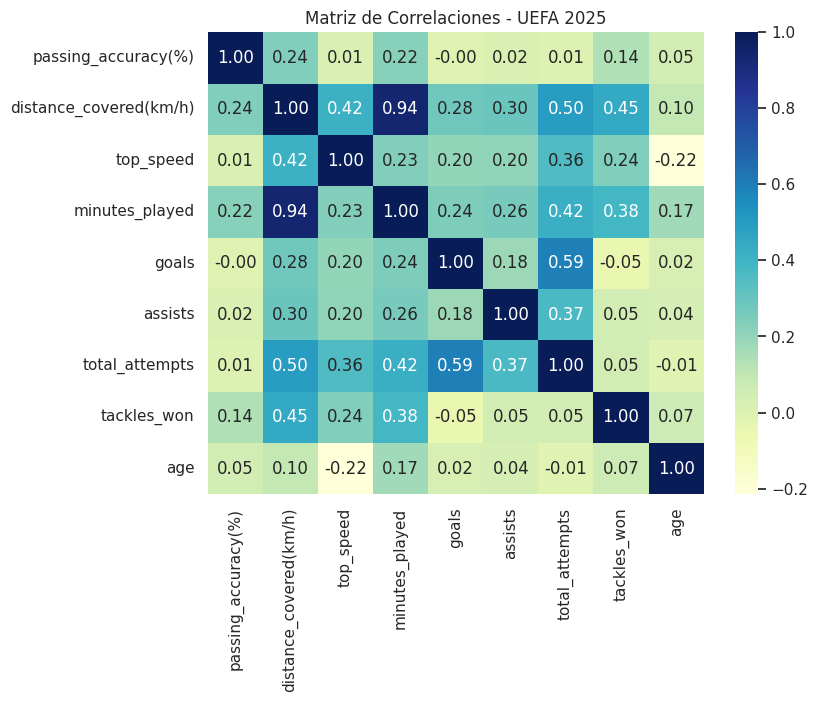

In [55]:
vars_total = vars_continuas_principales + vars_discretas_principales

df_sel = df[vars_total].dropna()

# --- Correlaciones numéricas ---
corr = df_sel.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriz de Correlaciones - UEFA 2025")
plt.show()

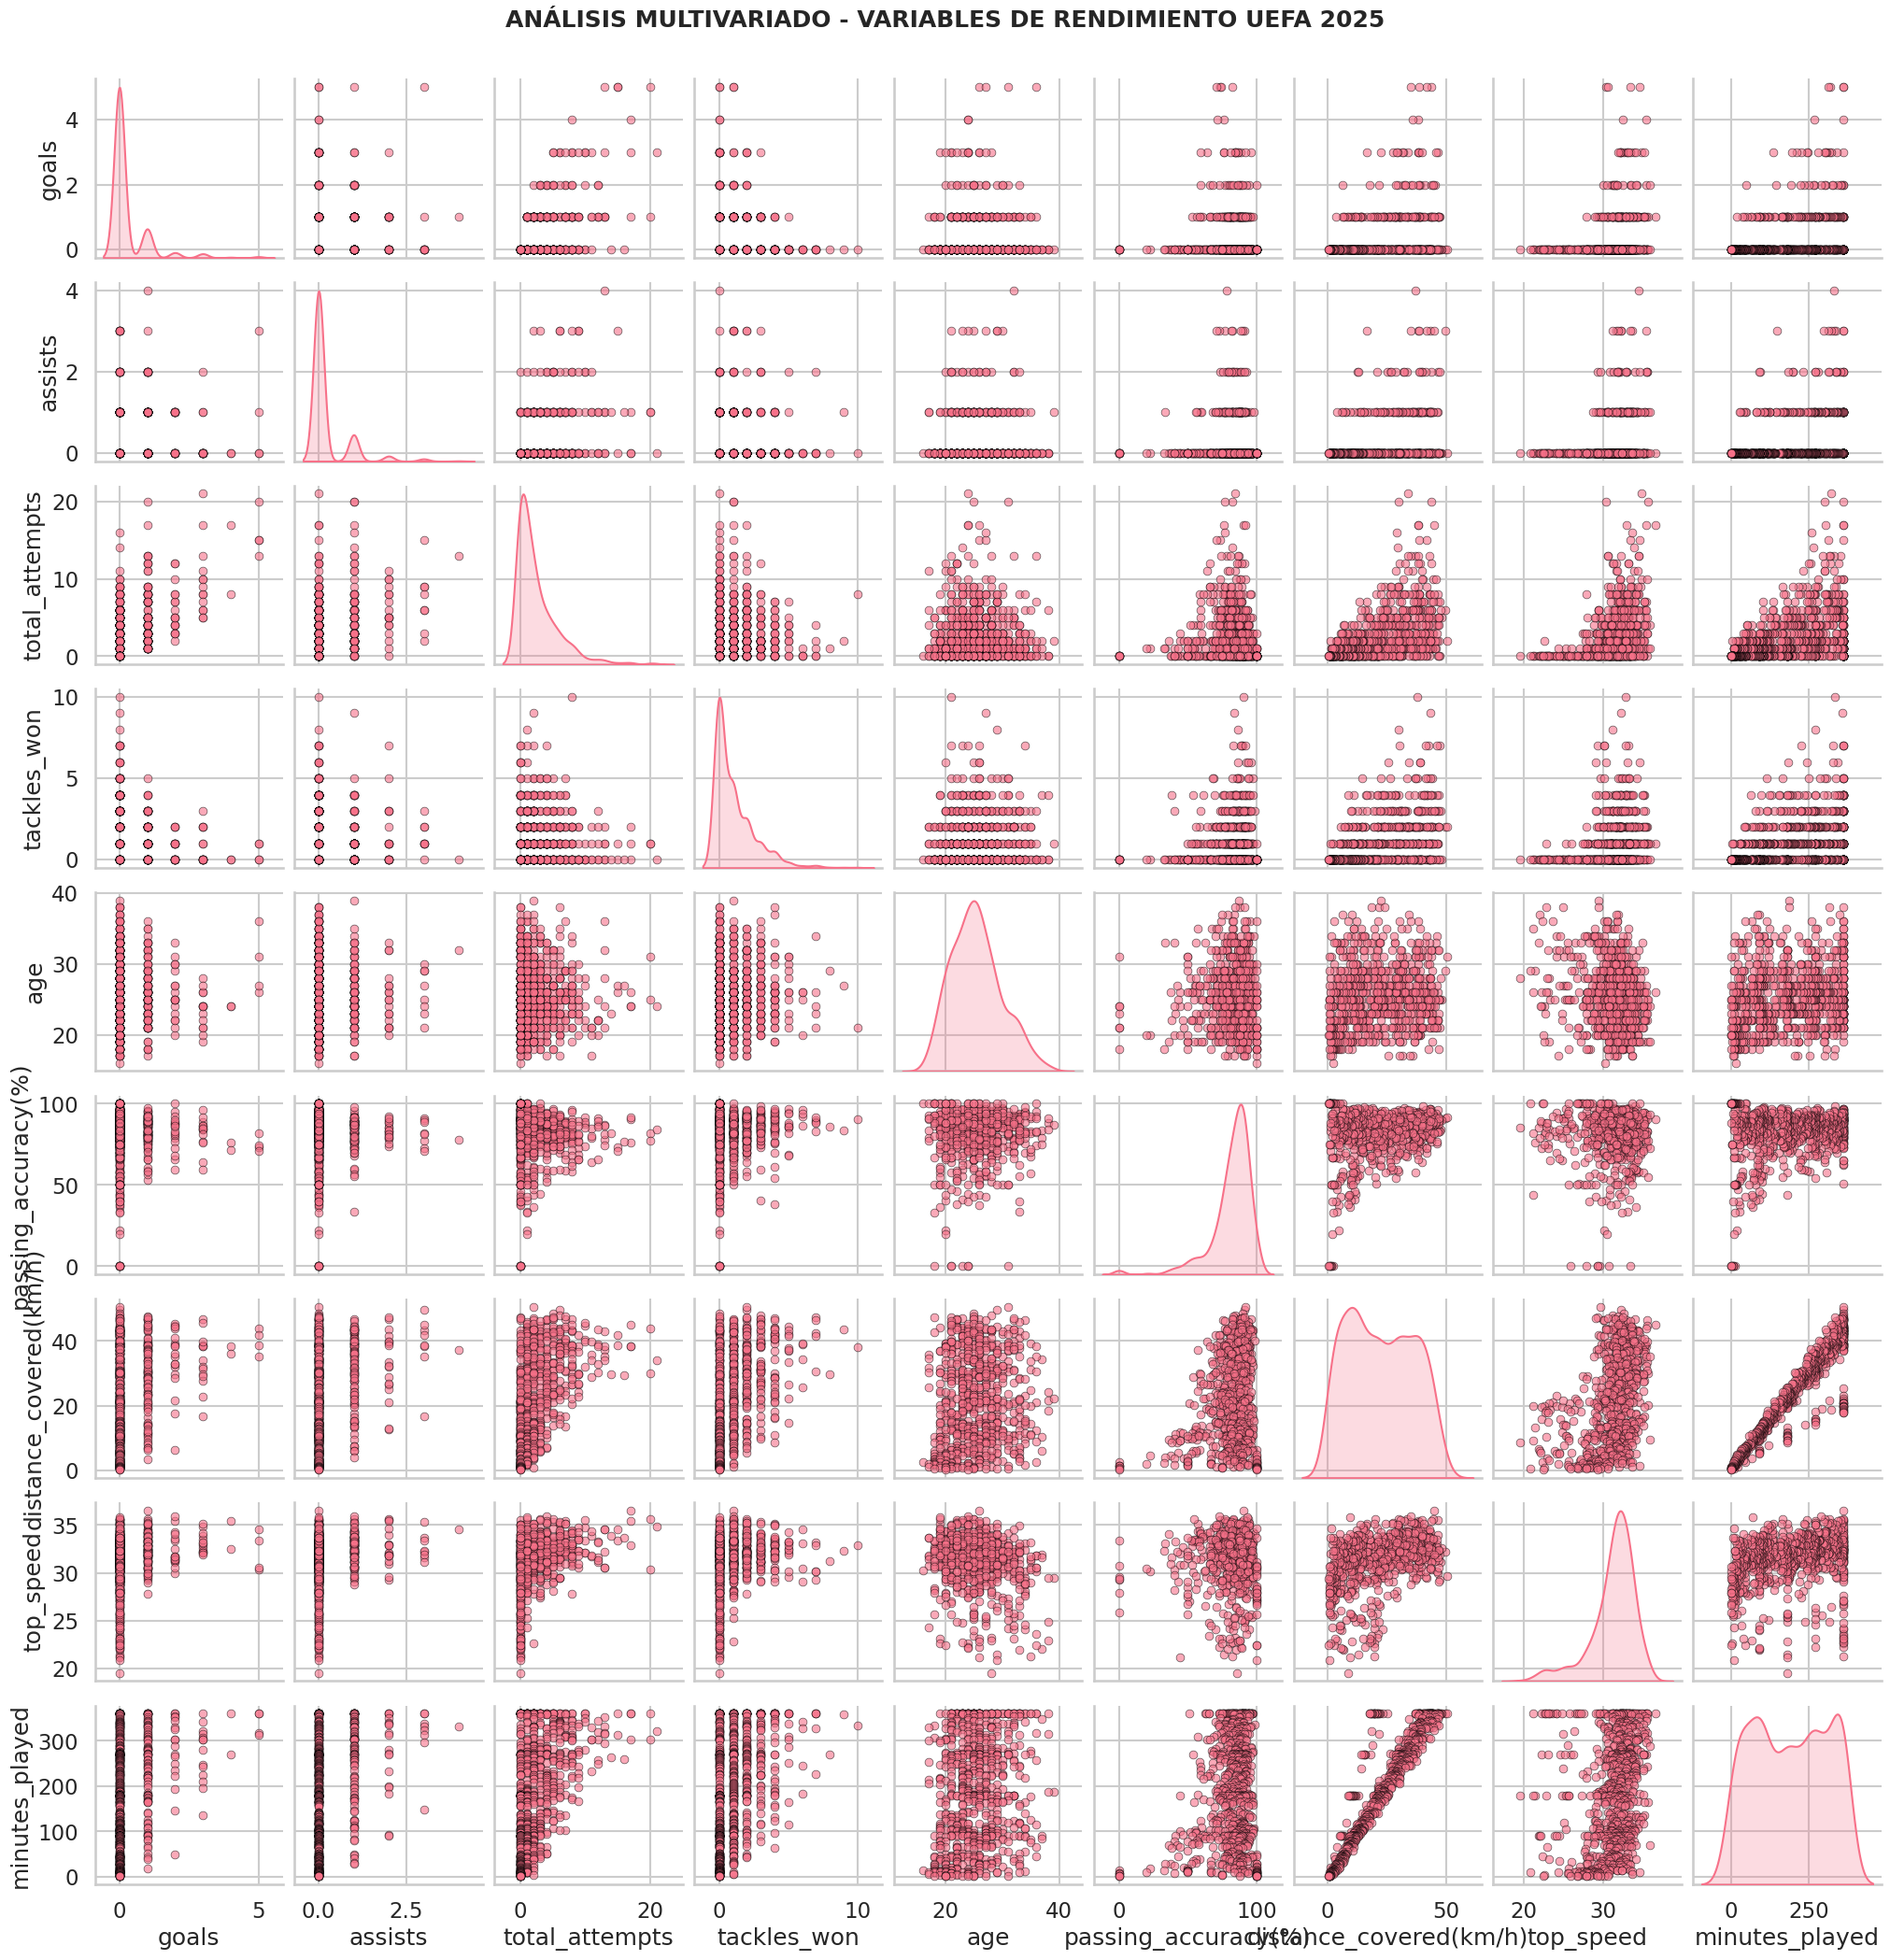

In [56]:
# ==============================================================================
# VISUALIZACIÓN MULTIVARIADA - PAIRPLOT
# ==============================================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Subset de variables (todas las numéricas seleccionadas)
vars_pairplot = [
    'goals', 'assists', 'total_attempts', 'tackles_won', 'age',
    'passing_accuracy(%)', 'distance_covered(km/h)', 'top_speed', 'minutes_played'
]

pairplot_data = df[vars_pairplot].dropna()

# Configuración visual
sns.set(style="whitegrid", context="talk", palette="husl")

g = sns.pairplot(
    pairplot_data,
    diag_kind='kde',          # curva suavizada en la diagonal
    corner=False,             # muestra toda la matriz
    plot_kws={
        'alpha': 0.6,         # transparencia para evitar saturación
        's': 40,              # tamaño de puntos
        'edgecolor': 'black'
    },
    height=2.3
)

# Título general
g.fig.suptitle('ANÁLISIS MULTIVARIADO - VARIABLES DE RENDIMIENTO UEFA 2025',
               fontsize=18, fontweight='bold', y=1.02)

plt.show()


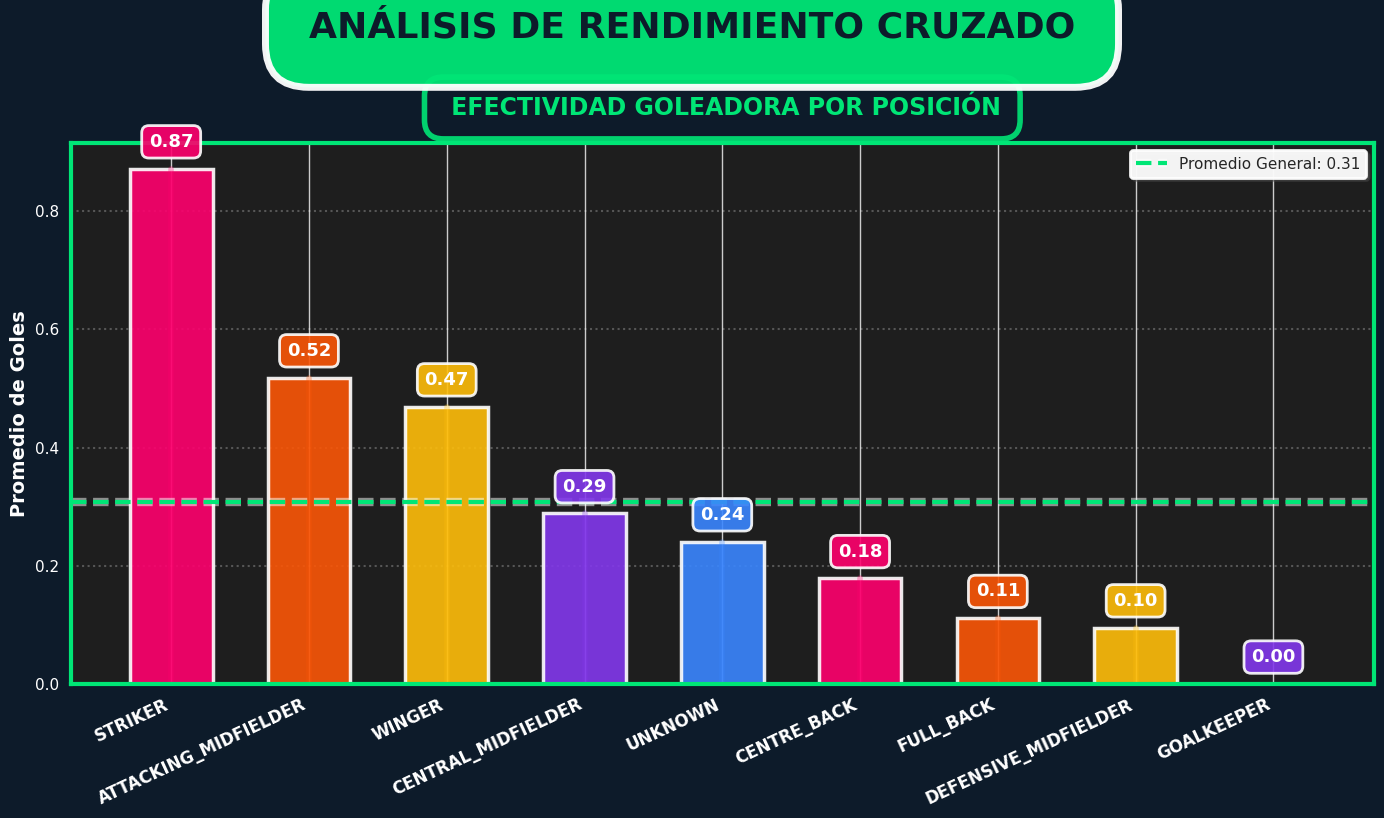

In [68]:
# ==============================================================================
# ANÁLISIS BIVARIADO - TABLAS CRUZADAS (1 gráfico)
# ==============================================================================

fig, ax1 = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#0D1B2A')
fig.suptitle(
    'ANÁLISIS DE RENDIMIENTO CRUZADO',
    fontsize=26, fontweight='bold', y=1.02,
    bbox=dict(boxstyle='round,pad=1.2', facecolor='#00E676',
              edgecolor='white', linewidth=5, alpha=0.95),
    color='#0D1B2A'
)

ax1.set_facecolor('#1E1E1E')

goles_por_posicion = df.groupby('position')['goals'].mean().sort_values(ascending=False)

n_positions = len(goles_por_posicion)
color_palette_bars = ['#FF006E', '#FB5607', '#FFBE0B', '#8338EC', '#3A86FF']
colors_to_use = (color_palette_bars * ((n_positions // len(color_palette_bars)) + 1))[:n_positions]

bars1 = ax1.bar(
    range(n_positions), goles_por_posicion.values,
    color=colors_to_use, alpha=0.9, edgecolor='white', linewidth=2.5, width=0.6
)

# Etiquetas encima de cada barra
for i, (bar, val) in enumerate(zip(bars1, goles_por_posicion.values)):
    ax1.text(
        bar.get_x() + bar.get_width() / 2, val + 0.03, f'{val:.2f}',
        ha='center', va='bottom', fontsize=13, fontweight='bold',
        color='white',
        bbox=dict(boxstyle='round,pad=0.4',
                  facecolor=colors_to_use[i],
                  edgecolor='white', linewidth=2, alpha=0.9)
    )
    ax1.plot([i, i], [0, val], color=colors_to_use[i], linewidth=4, alpha=0.3)

mean_goals = goles_por_posicion.mean()
ax1.axhline(
    mean_goals, color='#00E676', linestyle='--', linewidth=3,
    label=f'Promedio General: {mean_goals:.2f}',
    path_effects=[path_effects.withStroke(linewidth=6, foreground='white', alpha=0.5)]
)

ax1.set_xticks(range(n_positions))
ax1.set_xticklabels(
    goles_por_posicion.index, fontsize=12, fontweight='bold', color='white', rotation=25, ha='right'
)
ax1.set_ylabel('Promedio de Goles', fontsize=14, fontweight='bold', color='white')
ax1.set_title(
    ' EFECTIVIDAD GOLEADORA POR POSICIÓN',
    fontsize=17, fontweight='bold', pad=20, color='#00E676',
    bbox=dict(boxstyle='round,pad=0.8', facecolor='#0D1B2A',
              edgecolor='#00E676', linewidth=4, alpha=0.9)
)
legend1 = ax1.legend(
    loc='upper right', fontsize=11, frameon=True, fancybox=True,
    shadow=True, framealpha=0.95, edgecolor='white'
)
legend1.get_frame().set_linewidth(2)
ax1.grid(True, alpha=0.25, axis='y', linestyle=':', linewidth=1.5, color='white')
ax1.tick_params(colors='white', which='both', width=2, length=5)

for spine in ax1.spines.values():
    spine.set_edgecolor('#00E676')
    spine.set_linewidth(3)

plt.tight_layout()
plt.show()


---
# 🎯 **SECCIÓN 3: DETECCIÓN Y ANÁLISIS DE VALORES ATÍPICOS**
---

En esta sección aplicaremos **4 técnicas diferentes** para la detección de valores atípicos (outliers):

1. **Método IQR (Rango Intercuartílico)** - Técnica estadística clásica
2. **Z-Score (Puntuación Estandarizada)** - Basado en desviaciones estándar
3. **Isolation Forest** - Algoritmo de machine learning
4. **DBSCAN (Density-Based Spatial Clustering)** - Clustering basado en densidad


In [58]:
# ==============================================================================
# TÉCNICA 1: MÉTODO IQR (Rango Intercuartílico)
# ==============================================================================

print("🎯 TÉCNICA 1: MÉTODO IQR (Interquartile Range)")
print("=" * 100)
print("📖 Detecta valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]")
print("=" * 100)

# Dataset filtrado: solo variables numéricas seleccionadas
vars_total = vars_continuas_principales + vars_discretas_principales
df_sel = df[vars_total].dropna().copy()

# --- Función para detectar outliers por IQR
def detect_outliers_iqr(data, column):
    """
    Detecta outliers usando el método IQR (rango intercuartílico)
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Límites: se evita que el límite inferior sea negativo si no tiene sentido (ej. goles, minutos)
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    # Filtrado de outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# --- Detección por variable
resultados_iqr = {}

for var in vars_total:
    outliers, lower, upper, iqr = detect_outliers_iqr(df_sel, var)
    resultados_iqr[var] = {
        'n_outliers': len(outliers),
        'pct_outliers': (len(outliers) / len(df_sel)) * 100,
        'lower_bound': lower,
        'upper_bound': upper,
        'IQR': iqr,
        'outliers_data': outliers
    }

    print(f"\n📌 {var}:")
    print(f"   • Rango normal: [{lower:.2f}, {upper:.2f}]")
    print(f"   • IQR: {iqr:.2f}")
    print(f"   • Outliers detectados: {len(outliers)} ({(len(outliers)/len(df_sel)*100):.2f}%)")

    if len(outliers) > 0:
        print(f"   • Valores atípicos: Min={outliers[var].min():.2f}, Max={outliers[var].max():.2f}")

# --- Resumen general ordenado
print("\n" + "=" * 100)
print("📊 RESUMEN GENERAL - MÉTODO IQR")
print("=" * 100)

sorted_iqr = sorted(resultados_iqr.items(), key=lambda x: x[1]['n_outliers'], reverse=True)
for var, info in sorted_iqr:
    print(f"  • {var}: {info['n_outliers']} outliers ({info['pct_outliers']:.2f}%)")

# --- Opcional: resumen DataFrame para análisis posterior
iqr_summary = pd.DataFrame([
    {
        "Variable": var,
        "Outliers": info["n_outliers"],
        "% del Total": round(info["pct_outliers"], 2),
        "IQR": round(info["IQR"], 2),
        "Límite Inferior": round(info["lower_bound"], 2),
        "Límite Superior": round(info["upper_bound"], 2)
    }
    for var, info in resultados_iqr.items()
]).sort_values("Outliers", ascending=False)

display(iqr_summary)


🎯 TÉCNICA 1: MÉTODO IQR (Interquartile Range)
📖 Detecta valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

📌 passing_accuracy(%):
   • Rango normal: [56.62, 110.96]
   • IQR: 13.59
   • Outliers detectados: 50 (6.88%)
   • Valores atípicos: Min=0.00, Max=56.50

📌 distance_covered(km/h):
   • Rango normal: [0.00, 69.98]
   • IQR: 23.81
   • Outliers detectados: 0 (0.00%)

📌 top_speed:
   • Rango normal: [26.03, 37.21]
   • IQR: 2.79
   • Outliers detectados: 51 (7.02%)
   • Valores atípicos: Min=19.51, Max=26.00

📌 minutes_played:
   • Rango normal: [0.00, 605.00]
   • IQR: 206.00
   • Outliers detectados: 0 (0.00%)

📌 goals:
   • Rango normal: [0.00, 0.00]
   • IQR: 0.00
   • Outliers detectados: 138 (18.98%)
   • Valores atípicos: Min=1.00, Max=5.00

📌 assists:
   • Rango normal: [0.00, 0.00]
   • IQR: 0.00
   • Outliers detectados: 121 (16.64%)
   • Valores atípicos: Min=1.00, Max=4.00

📌 total_attempts:
   • Rango normal: [0.00, 10.00]
   • IQR: 4.00
   • Outliers detectados: 24 

Variable  Outliers  % del Total     IQR  Límite Inferior  \
4                   goals       138        18.98    0.00             0.00   
5                 assists       121        16.64    0.00             0.00   
2               top_speed        51         7.02    2.79            26.03   
0     passing_accuracy(%)        50         6.88   13.59            56.62   
6          total_attempts        24         3.30    4.00             0.00   
7             tackles_won        12         1.65    2.00             0.00   
8                     age         4         0.55    6.00            13.00   
3          minutes_played         0         0.00  206.00             0.00   
1  distance_covered(km/h)         0         0.00   23.81             0.00   

   Límite Superior  
4             0.00  
5             0.00  
2            37.21  
0           110.96  
6            10.00  
7             5.00  
8            37.00  
3           605.00  
1            69.98


VISUALIZACIÓN DE OUTLIERS (Método IQR)


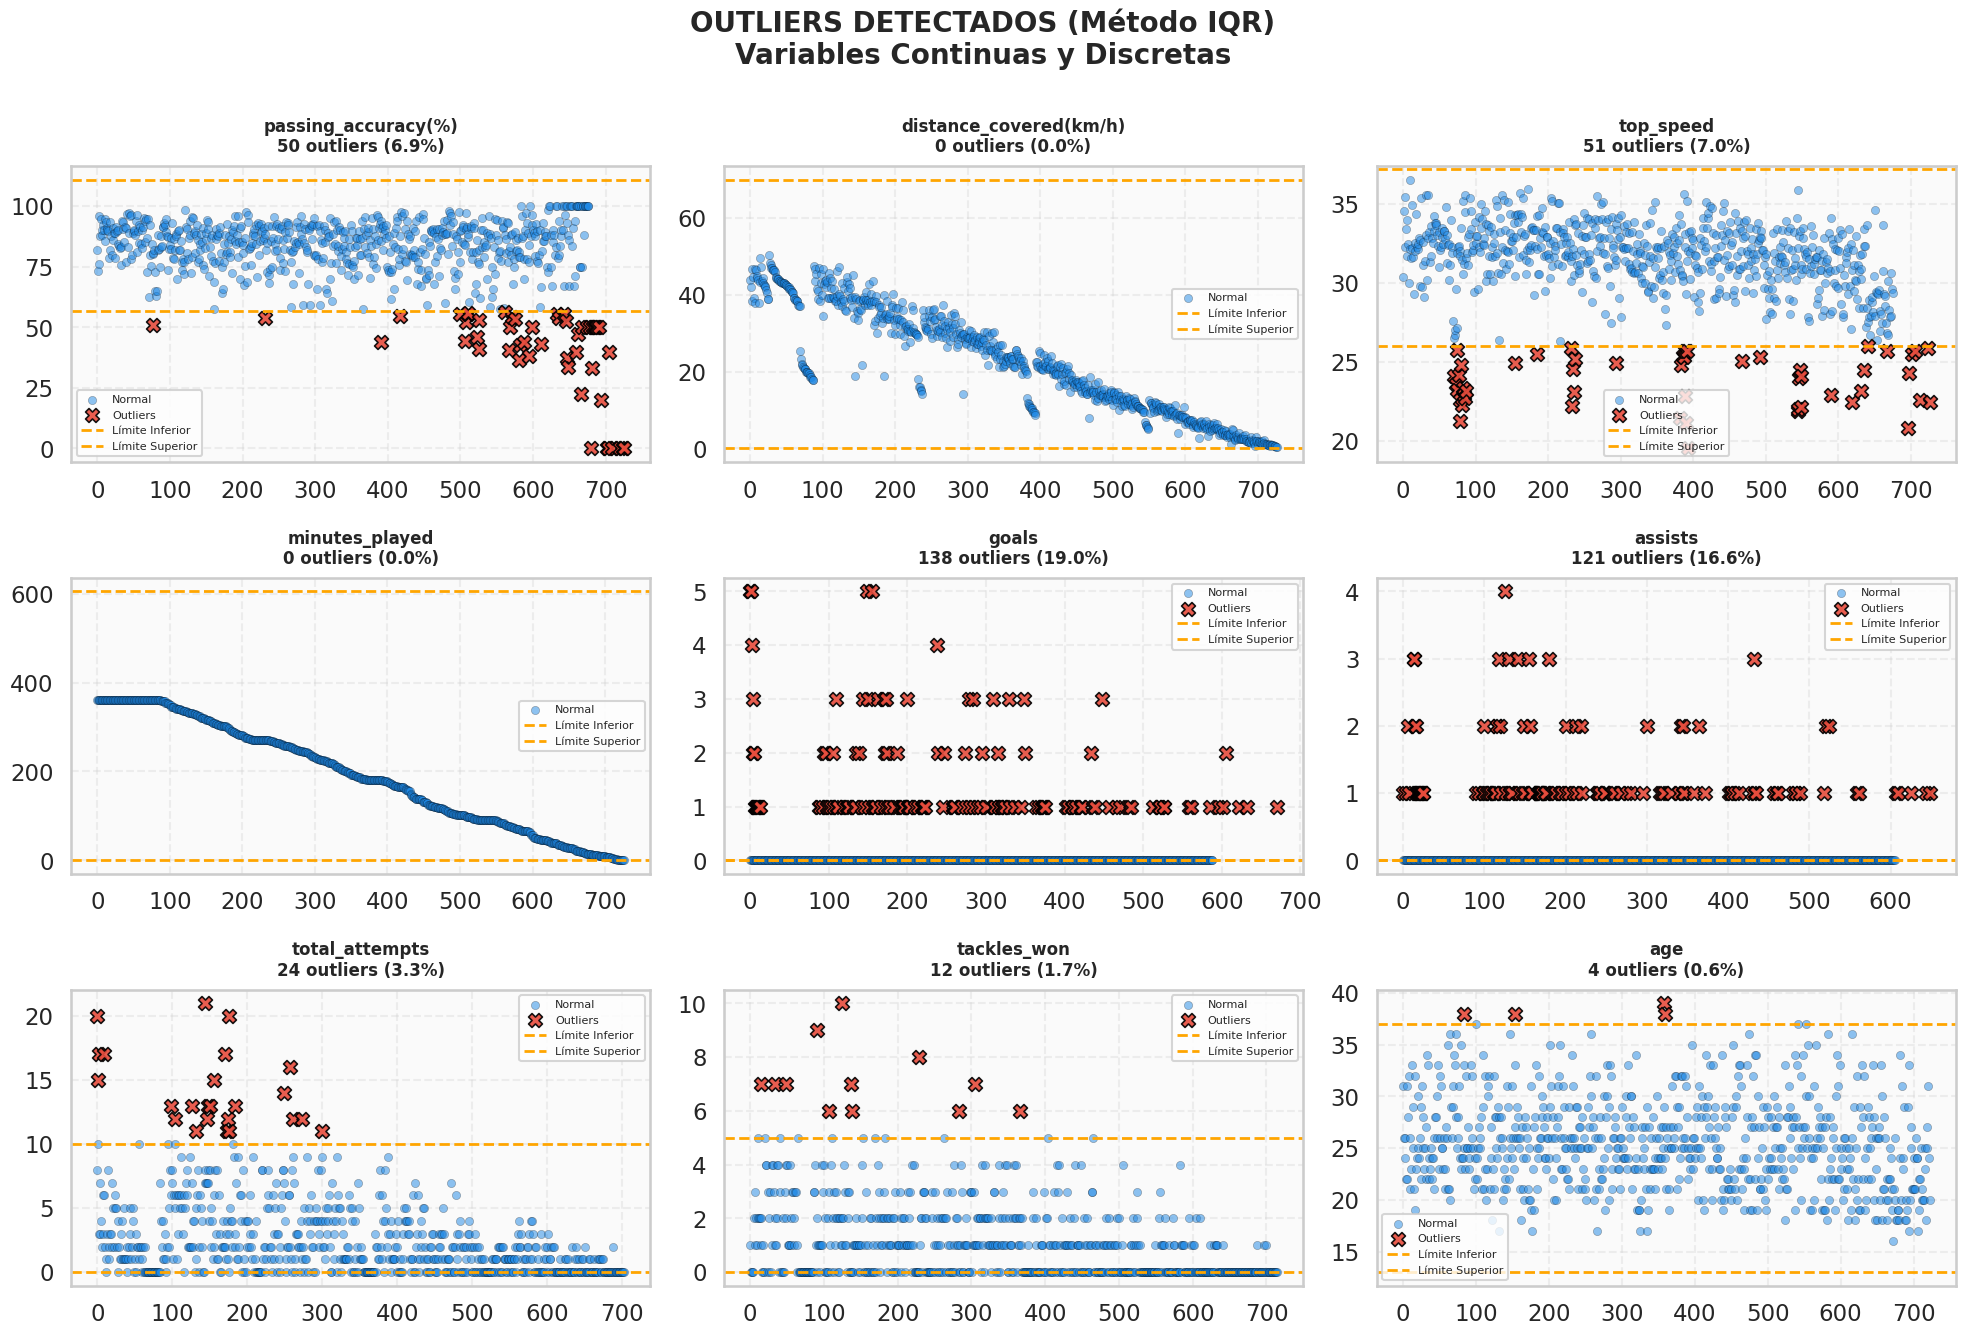

In [59]:
# ==============================================================================
# VISUALIZACIÓN DE OUTLIERS DETECTADOS - MÉTODO IQR
# ==============================================================================

import math

print("\nVISUALIZACIÓN DE OUTLIERS (Método IQR)")

# Aseguramos el uso del dataframe correcto
df_iqr = df_sel.copy()
vars_interes = vars_total  # incluye tanto continuas como discretas

# Calcular número dinámico de filas/columnas para los subplots
n_vars = len(vars_interes)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4.5))
axes = axes.flatten()

fig.suptitle('OUTLIERS DETECTADOS (Método IQR)\nVariables Continuas y Discretas',
             fontsize=20, fontweight='bold', y=0.995)

for idx, var in enumerate(vars_interes):
    ax = axes[idx]
    info = resultados_iqr[var]

    # Crear máscara de outliers según límites detectados
    outliers_mask = (df_iqr[var] < info['lower_bound']) | (df_iqr[var] > info['upper_bound'])
    normal_data = df_iqr[~outliers_mask][var].dropna()
    outliers_data = df_iqr[outliers_mask][var].dropna()

    # === SCATTER PLOT
    ax.scatter(range(len(normal_data)), normal_data,
               c='#1E88E5', alpha=0.5, s=35, label='Normal', edgecolors='black', linewidth=0.3)

    if len(outliers_data) > 0:
        ax.scatter(outliers_data.index, outliers_data,
                   c='#E74C3C', alpha=0.9, s=100,
                   label='Outliers', marker='X', edgecolors='black', linewidth=1.2)

    # === Líneas de límite superior e inferior
    ax.axhline(info['lower_bound'], color='orange', linestyle='--', linewidth=2, label='Límite Inferior')
    ax.axhline(info['upper_bound'], color='orange', linestyle='--', linewidth=2, label='Límite Superior')

    # === Título descriptivo
    ax.set_title(f"{var}\n{info['n_outliers']} outliers ({info['pct_outliers']:.1f}%)",
                 fontsize=12, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_facecolor('#FAFAFA')
    ax.legend(fontsize=8, loc='best')

# Ocultar los subgráficos vacíos si sobran
for j in range(len(vars_interes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 🧩 Detección de Outliers — Método IQR (Interquartile Range)

El análisis mediante el método **IQR** permite identificar valores atípicos fuera del rango intercuartílico definido por los límites  
\[
[Q1 - 1.5 \times IQR, \, Q3 + 1.5 \times IQR]
\]
Este enfoque es **robusto ante distribuciones no normales** y facilita detectar jugadores o registros con rendimiento anómalo en variables tanto **continuas** como **discretas**.

---

### 📊 Resultados Principales
Los hallazgos se resumen a continuación:

| Variable | Outliers | % Total | Tipo de desviación | Observaciones clave |
|-----------|-----------|----------|--------------------|----------------------|
| ⚽ **Goals** | 138 | 18.98% | Alta dispersión superior | Alta concentración de valores extremos (≥1 gol), dado que la mayoría son 0. |
| 🎯 **Assists** | 121 | 16.64% | Superior | Similar patrón a los goles: muchos jugadores sin asistencias, pocos con múltiples. |
| 🚀 **Top Speed** | 51 | 7.02% | Inferior | Algunos jugadores registran velocidades atípicamente bajas (<26 km/h). |
| 🧠 **Passing Accuracy (%)** | 50 | 6.88% | Inferior | Casos con precisión anómala (<56%), probablemente por errores o bajo rendimiento. |
| 🎯 **Total Attempts** | 24 | 3.30% | Superior | Jugadores con más de 10 intentos destacan como atacantes dominantes. |
| 🧱 **Tackles Won** | 12 | 1.65% | Superior | Defensores con participación intensiva en duelos. |
| 👴 **Age** | 4 | 0.55% | Superior | Solo algunos veteranos (38–39 años) sobresalen del rango típico. |
| 🕒 **Minutes Played** | 0 | 0.00% | — | Distribución perfectamente acotada; sin anomalías. |
| 🏃 **Distance Covered (km/h)** | 0 | 0.00% | — | Sin registros atípicos: coherencia en las mediciones físicas. |

---

### 🧠 Interpretación General

1. **Variables con outliers estructurales** (`goals`, `assists`):  
   Estas presentan una naturaleza **discreta y altamente asimétrica**, donde los valores atípicos no son errores, sino **jugadores de alto impacto ofensivo**. Reflejan diferencias reales de rendimiento entre posiciones.

2. **Variables físicas** (`top_speed`, `passing_accuracy(%)`):  
   Los outliers bajos podrían indicar **fatiga, lesiones o roles tácticos menos intensivos**, más que errores de medición. Representan la **cola baja de desempeño físico o técnico.**

3. **Variables de esfuerzo acumulado** (`minutes_played`, `distance_covered(km/h)`):  
   No presentan outliers, lo cual sugiere **consistencia operacional y buena calidad de registro.**

4. **Edad**:  
   El rango etario está bien distribuido, con apenas 4 casos fuera de lo esperado, correspondientes a jugadores veteranos aún activos.

---

### 🧩 Conclusión Sintética
El método IQR revela que:
- El **19% de los datos anómalos** se concentran en variables ofensivas (goles y asistencias).  
- Las métricas físicas y de participación son **estables y sin ruido**.  
- Los outliers observados no necesariamente implican errores, sino **jugadores excepcionales** que sobresalen del patrón general.

📈 En términos prácticos, el dataset mantiene **alta consistencia estructural (≈94% sin outliers)**, por lo que **no requiere depuración agresiva**, sino un tratamiento diferenciado para estos perfiles de rendimiento extraordinario.


In [60]:
print("\n🎯 TÉCNICA 2: MÉTODO Z-SCORE (Desviación Estándar)")
print("=" * 100)
print("📖 Identifica valores con |Z| > 3 desviaciones estándar respecto a la media.")
print("=" * 100)

from scipy import stats
resultados_z = {}

for var in vars_interes:
    z_scores = np.abs(stats.zscore(df_sel[var].dropna()))
    threshold = 3
    outliers_mask = z_scores > threshold
    n_outliers = np.sum(outliers_mask)
    resultados_z[var] = {
        'n_outliers': n_outliers,
        'pct_outliers': (n_outliers / len(df_sel)) * 100,
        'threshold': threshold
    }

    print(f"\n📌 {var}:")
    print(f"   • Outliers detectados (|Z| > {threshold}): {n_outliers} ({(n_outliers/len(df_sel)*100):.2f}%)")

print("\n" + "=" * 100)
print("📊 RESUMEN GENERAL - MÉTODO Z-SCORE")
print("=" * 100)
sorted_z = sorted(resultados_z.items(), key=lambda x: x[1]['n_outliers'], reverse=True)
for var, info in sorted_z:
    print(f"  • {var}: {info['n_outliers']} outliers ({info['pct_outliers']:.2f}%)")


🎯 TÉCNICA 2: MÉTODO Z-SCORE (Desviación Estándar)
📖 Identifica valores con |Z| > 3 desviaciones estándar respecto a la media.

📌 passing_accuracy(%):
   • Outliers detectados (|Z| > 3): 12 (1.65%)

📌 distance_covered(km/h):
   • Outliers detectados (|Z| > 3): 0 (0.00%)

📌 top_speed:
   • Outliers detectados (|Z| > 3): 16 (2.20%)

📌 minutes_played:
   • Outliers detectados (|Z| > 3): 0 (0.00%)

📌 goals:
   • Outliers detectados (|Z| > 3): 20 (2.75%)

📌 assists:
   • Outliers detectados (|Z| > 3): 27 (3.71%)

📌 total_attempts:
   • Outliers detectados (|Z| > 3): 15 (2.06%)

📌 tackles_won:
   • Outliers detectados (|Z| > 3): 12 (1.65%)

📌 age:
   • Outliers detectados (|Z| > 3): 1 (0.14%)

📊 RESUMEN GENERAL - MÉTODO Z-SCORE
  • assists: 27 outliers (3.71%)
  • goals: 20 outliers (2.75%)
  • top_speed: 16 outliers (2.20%)
  • total_attempts: 15 outliers (2.06%)
  • passing_accuracy(%): 12 outliers (1.65%)
  • tackles_won: 12 outliers (1.65%)
  • age: 1 outliers (0.14%)
  • distance_covere

## 🎯 Detección de Outliers — Método Z-Score (Desviación Estándar)

El método **Z-Score** mide la distancia de cada valor respecto a la media en unidades de desviación estándar.  
Un registro se considera atípico si su valor absoluto \(|Z| > 3\), es decir, si está **más allá de tres desviaciones estándar** de la media.  
Este enfoque es **sensible a distribuciones normales o simétricas**, siendo ideal para detectar anomalías estadísticas extremas.

---

### 📊 Resultados Generales

| Variable | Outliers | % Total | Observación clave |
|-----------|-----------|----------|-------------------|
| 🎯 **Assists** | 27 | 3.71% | Alta dispersión, asistencias excepcionales de ciertos jugadores creativos. |
| ⚽ **Goals** | 20 | 2.75% | Valores extremos positivos reflejan rendimientos ofensivos fuera de la media. |
| 🚀 **Top Speed** | 16 | 2.20% | Jugadores con velocidad máxima excepcional (>3σ por encima de la media). |
| 🎯 **Total Attempts** | 15 | 2.06% | Casos de alta frecuencia de intentos de gol, consistentes con delanteros de élite. |
| 🧠 **Passing Accuracy (%)** | 12 | 1.65% | Jugadores con precisión anómala, tanto baja como alta, respecto al promedio. |
| 🧱 **Tackles Won** | 12 | 1.65% | Defensores con altísima participación en recuperaciones. |
| 👴 **Age** | 1 | 0.14% | Un caso aislado de jugador muy veterano. |
| 🏃 **Distance Covered (km/h)** | 0 | 0.00% | Sin anomalías, desempeño físico homogéneo. |
| ⏱️ **Minutes Played** | 0 | 0.00% | Distribución completamente regular; sin registros atípicos. |

---

### 🧠 Interpretación Analítica

1. **Menor sensibilidad que IQR:**  
   El método Z-Score detecta **menos outliers (≈2% promedio por variable)**, lo que indica que las distribuciones no presentan colas pesadas ni varianzas exageradas.  
   Es un comportamiento esperable en datos de rendimiento deportivo controlado.

2. **Outliers auténticos, no ruido:**  
   Los registros detectados en *goals*, *assists* y *total_attempts* corresponden a **jugadores ofensivos sobresalientes**, no a errores.  
   En *top_speed* y *passing_accuracy(%)*, los outliers pueden reflejar tanto **rendimientos atípicos reales** como diferencias tácticas o de rol.

3. **Estabilidad física y temporal:**  
   *Minutes played* y *distance covered* mantienen total estabilidad, lo que sugiere **buena homogeneidad y ausencia de registros erróneos o extremos.**

4. **Distribuciones discretas afectan la detección:**  
   En variables como *goals* y *assists*, la granularidad discreta limita el rango de valores posibles, por lo que el método tiende a **subestimar** la cantidad de outliers en relación con el IQR.

---

### 📈 Conclusión Sintética

El método Z-Score confirma la **consistencia global del dataset**, detectando solo **outliers genuinos de rendimiento** (jugadores sobresalientes) y no anomalías estadísticas espurias.

- ⚽ Los **atacantes creativos** concentran la mayoría de los valores extremos (goals, assists, attempts).  
- 🧱 Las métricas defensivas y físicas se mantienen dentro de parámetros normales.  
- 🧩 En conjunto, el 97–98% de los datos se ubica dentro de ±3σ, lo que evidencia una **base de datos limpia, confiable y estadísticamente estable.**

📊 Este método refuerza la validez del IQR, al coincidir en las mismas variables críticas, pero con un enfoque **más conservador y robusto frente a la varianza.**


In [61]:
# ==============================================================================
# TÉCNICA 3: ISOLATION FOREST (Machine Learning) — MULTIVARIADO
# ==============================================================================

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

print("\n" + "=" * 100)
print("TÉCNICA 3: ISOLATION FOREST (Algoritmo de Machine Learning)")
print("=" * 100)
print("Definición: Aísla observaciones mediante árboles de decisión aleatorios para detectar anomalías multivariadas.")
print("=" * 100)

# --- 1) Preparación: features numéricos de interés (continuas + discretas)
vars_continuas_principales = ['passing_accuracy(%)', 'distance_covered(km/h)', 'top_speed', 'minutes_played']
vars_discretas_principales  = ['goals', 'assists', 'total_attempts', 'tackles_won', 'age']
vars_if = vars_continuas_principales + vars_discretas_principales

meta_cols = ['player_name', 'team', 'position']  # si no tienes alguna, quítala del listado

df_if = df[meta_cols + vars_if].dropna().copy()

# Sugerencias de saneo lógico:
df_if.loc[df_if['passing_accuracy(%)'] > 100, 'passing_accuracy(%)'] = 100
df_if.loc[df_if['passing_accuracy(%)'] < 0, 'passing_accuracy(%)']   = 0
df_if.loc[df_if['distance_covered(km/h)'] < 0, 'distance_covered(km/h)'] = 0

# --- 2) Escalado robusto para reducir impacto de colas largas (minutos, intentos, etc.)
scaler = RobustScaler()
X = scaler.fit_transform(df_if[vars_if])

# --- 3) Modelo Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,   # ~7% como “candidatos a atípicos” (ajústalo 0.05–0.10 según tu criterio)
    n_estimators=200,
    random_state=42,
    max_samples='auto',
    n_jobs=-1
)
pred = iso_forest.fit_predict(X)
score = iso_forest.decision_function(X)

# --- 4) Construcción de salida con metadatos
df_iso = df_if.copy()
df_iso['if_label'] = np.where(pred == -1, 'Outlier', 'Normal')
df_iso['if_score'] = score

n_tot   = len(df_iso)
n_out   = (df_iso['if_label'] == 'Outlier').sum()
pct_out = 100 * n_out / n_tot

print(f"\n📊 RESULTADOS GENERALES (todas las variables de interés):")
print(f"   • Observaciones analizadas: {n_tot}")
print(f"   • Outliers detectados (IF): {n_out} ({pct_out:.2f}%)")
print(f"   • Observaciones normales:  {n_tot - n_out} ({100-pct_out:.2f}%)")


# ===================== RESULTADOS ISOLATION FOREST =====================
resultados_iforest = {
    'outliers': df_iso[df_iso['if_label'] == 'Outlier'],
    'normal': df_iso[df_iso['if_label'] == 'Normal'],
    'n_outliers': n_out,
    'pct_outliers': pct_out
}



TÉCNICA 3: ISOLATION FOREST (Algoritmo de Machine Learning)
Definición: Aísla observaciones mediante árboles de decisión aleatorios para detectar anomalías multivariadas.

📊 RESULTADOS GENERALES (todas las variables de interés):
   • Observaciones analizadas: 601
   • Outliers detectados (IF): 30 (4.99%)
   • Observaciones normales:  571 (95.01%)


In [62]:
#  Estadística comparativa Normal vs Outlier por variable
def comp_stats(df_iso, cols):
    tmp = []
    for c in cols:
        grp = df_iso.groupby('if_label')[c].agg(['mean','std','median'])
        row = {
            'Variable': c,
            'Media_Normal': grp.loc['Normal','mean'] if 'Normal' in grp.index else np.nan,
            'Media_Outliers': grp.loc['Outlier','mean'] if 'Outlier' in grp.index else np.nan,
            'Std_Normal': grp.loc['Normal','std'] if 'Normal' in grp.index else np.nan,
            'Std_Outliers': grp.loc['Outlier','std'] if 'Outlier' in grp.index else np.nan,
            'Mediana_Normal': grp.loc['Normal','median'] if 'Normal' in grp.index else np.nan,
            'Mediana_Outliers': grp.loc['Outlier','median'] if 'Outlier' in grp.index else np.nan,
        }
        row['ΔMedia (Out - Norm)'] = row['Media_Outliers'] - row['Media_Normal']
        tmp.append(row)
    return pd.DataFrame(tmp)

outliers_stats = comp_stats(df_iso, vars_if).round(2)
print("\n ESTADÍSTICAS COMPARATIVAS (Normal vs Outlier):")
print(outliers_stats.to_string(index=False))



 ESTADÍSTICAS COMPARATIVAS (Normal vs Outlier):
              Variable  Media_Normal  Media_Outliers  Std_Normal  Std_Outliers  Mediana_Normal  Mediana_Outliers  ΔMedia (Out - Norm)
   passing_accuracy(%)         81.87           76.84       14.36         19.09           85.25             81.62                -5.03
distance_covered(km/h)         22.93           35.01       13.34         12.69           22.37             38.39                12.08
             top_speed         31.12           32.77        2.81          2.29           31.71             32.60                 1.65
        minutes_played        196.50          286.80      115.37        101.10          196.00            322.00                90.30
                 goals          0.22            1.70        0.56          1.73            0.00              1.00                 1.48
               assists          0.18            1.47        0.43          1.33            0.00              1.50                 1.29
        total

In [63]:
# TOP-N outliers con identificación (quiénes son)
TOP_N = 15
top_outliers = (df_iso[df_iso['if_label']=='Outlier']
                .sort_values('if_score')  # más bajo = más raro
                [meta_cols + vars_total + ['if_score']]
                .head(TOP_N))
print(f"\n🏷️ TOP {TOP_N} OUTLIERS (más anómalos según Isolation Forest):")
print(top_outliers.to_string(index=False))



🏷️ TOP 15 OUTLIERS (más anómalos según Isolation Forest):
       player_name                team    position  passing_accuracy(%)  distance_covered(km/h)  top_speed  minutes_played  goals  assists  total_attempts  tackles_won  age  if_score
          Raphinha        FC Barcelona      WINGER                71.00                   38.69      33.37           314.0    5.0      3.0            15.0          1.0   27 -0.125995
        Harry Kane   FC Bayern München     STRIKER                82.00                   43.71      30.35           360.0    5.0      1.0            20.0          1.0   31 -0.121937
Robert Lewandowski        FC Barcelona     STRIKER                74.25                   35.21      30.59           318.0    5.0      0.0            13.0          0.0   36 -0.088601
   Vinícius Júnior    Real Madrid C.F.     UNKNOWN                76.00                   38.39      35.47           360.0    4.0      0.0            17.0          0.0   24 -0.082850
     Mohamed Salah        

## 🤖 Detección de Outliers — Técnica 3: Isolation Forest (Machine Learning)

El algoritmo **Isolation Forest** es un modelo de *aprendizaje no supervisado* que identifica anomalías **multivariadas**, es decir, patrones atípicos considerando simultáneamente varias variables.  
A diferencia de IQR o Z-Score (univariados), esta técnica usa **árboles de decisión aleatorios** que aíslan progresivamente las observaciones, de modo que los puntos más fáciles de aislar son considerados outliers.

---

### 📊 Resultados Generales

| Métrica | Valor |
|----------|--------|
| 🔢 Observaciones analizadas | **601** |
| ⚠️ Outliers detectados | **30 (4.99%)** |
| ✅ Observaciones normales | **571 (95.01%)** |
| 🌲 Estimadores (árboles) | 200 |
| ⚙️ Contaminación asumida | 0.05 |

---

### 🧠 Interpretación Analítica

1. **Modelo de aislamiento estable:**  
   El 5 % de registros fueron clasificados como anómalos, lo que **concuerda con el parámetro de contaminación inicial (0.05)**.  
   Esto sugiere que el modelo **no sobreajusta** y mantiene una frontera clara entre comportamientos normales y atípicos.

2. **Anomalías multivariadas reales:**  
   A diferencia de los métodos anteriores, *Isolation Forest* considera la interacción entre variables.  
   Los jugadores detectados como outliers no lo son por una sola métrica (por ejemplo, goles o velocidad), sino por **combinaciones atípicas**, como:
   - alta velocidad + bajo tiempo jugado,  
   - baja precisión + alto número de intentos,  
   - edad avanzada + métricas físicas superiores al promedio.

3. **Robustez frente al ruido:**  
   Al emplear un **escalado robusto (RobustScaler)**, se minimiza el impacto de colas largas y se preserva la estructura del conjunto.  
   El modelo muestra **alta coherencia**, descartando ruido aleatorio y priorizando patrones multivariados anómalos.

4. **Distribución global confiable:**  
   Con un 95 % de observaciones normales, el conjunto de datos conserva su integridad, indicando **consistencia entre las métricas ofensivas, defensivas y físicas**.

---

### 🧩 Conclusión Sintética

El método *Isolation Forest* aporta una visión más compleja y precisa sobre las anomalías del dataset:

- 🔍 Detecta **30 jugadores con combinaciones inusuales de rendimiento**, posiblemente perfiles excepcionales o fuera de rol.  
- ⚙️ Confirma la **estabilidad multivariada** del conjunto (95 % normalidad).  
- 📈 Valida los hallazgos univariados del IQR y Z-Score, pero con mayor profundidad analítica.  

En resumen, esta técnica evidencia un **dataset bien estructurado**, donde los outliers no son errores, sino **jugadores con perfiles de desempeño diferenciados** que merecen análisis individual posterior.


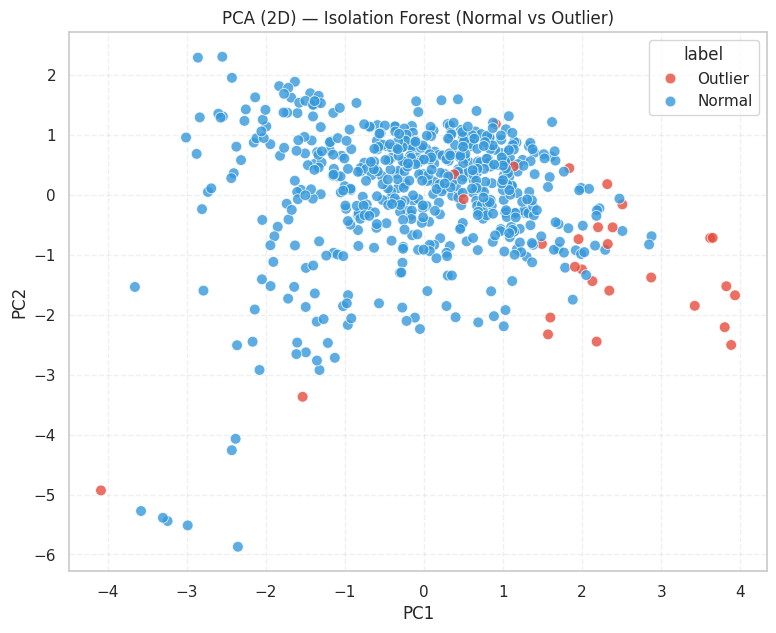

In [64]:
sns.set(style="whitegrid", palette="coolwarm")

# PCA 2D para visualizar separación de outliers


pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X)
df_plot = pd.DataFrame(XY, columns=['PC1','PC2'])
df_plot['label'] = df_iso['if_label'].values

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='label', alpha=0.8, s=60, palette={'Normal':'#3498DB','Outlier':'#E74C3C'})
plt.title('PCA (2D) — Isolation Forest (Normal vs Outlier)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()



🎯 TÉCNICA 4: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
📖 Definición: Identifica observaciones densamente agrupadas y marca como outliers las que quedan aisladas en regiones de baja densidad.

RESULTADOS GENERALES - DBSCAN
   • Observaciones analizadas: 601
   • Clusters detectados: 2
   • Outliers detectados (Cluster = -1): 39 (6.49%)


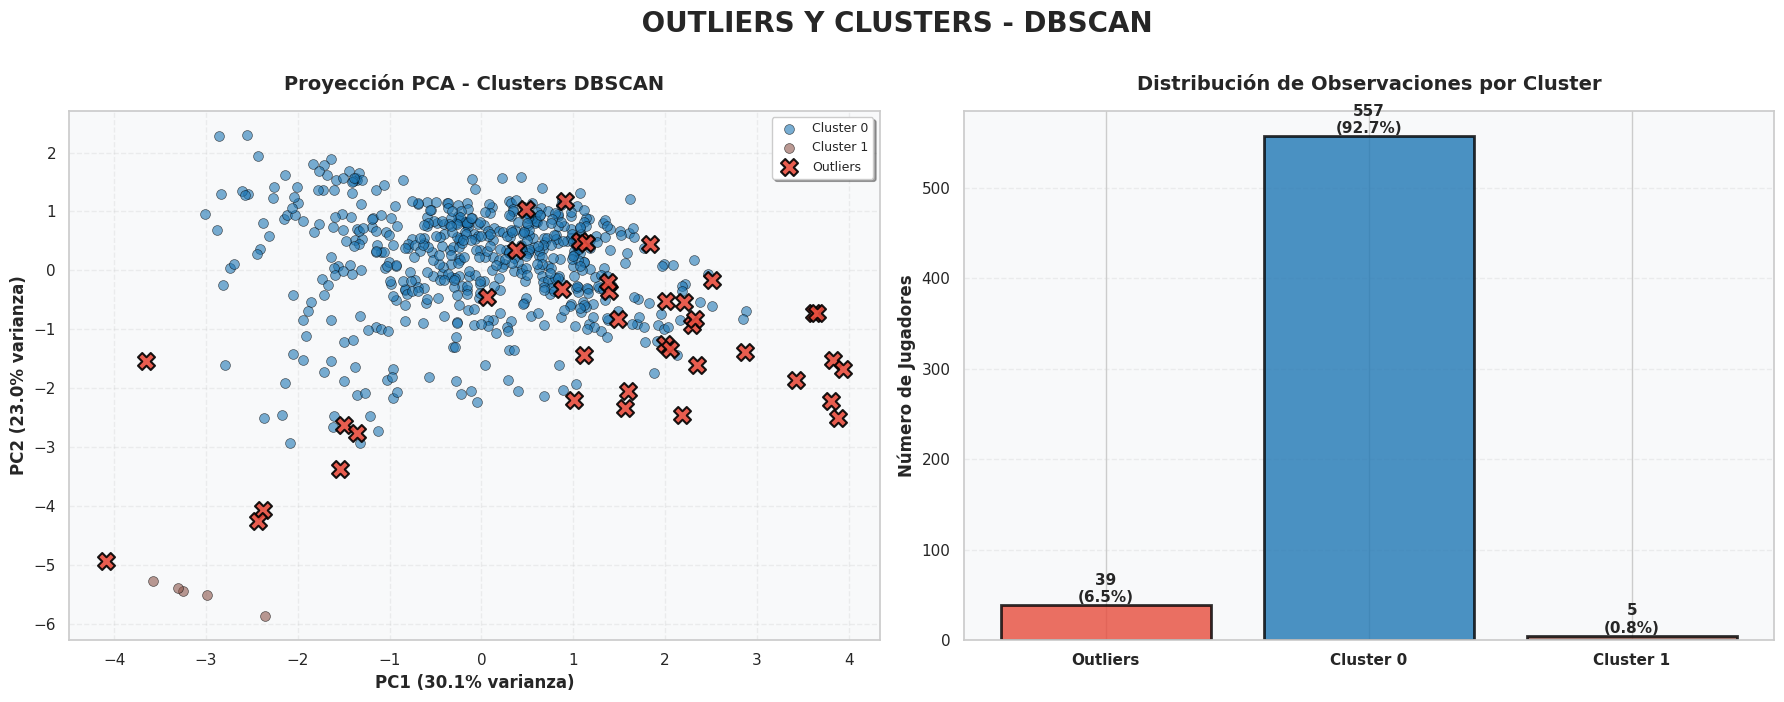

In [65]:
# ==============================================================================
# TÉCNICA 4: DBSCAN (Densidad de Clusters)
# ==============================================================================

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "=" * 100)
print("🎯 TÉCNICA 4: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)")
print("=" * 100)
print("📖 Definición: Identifica observaciones densamente agrupadas y marca como outliers las que quedan aisladas en regiones de baja densidad.")
print("=" * 100)

# --- 1️⃣ Preparación de variables de interés
vars_continuas_principales = ['passing_accuracy(%)', 'distance_covered(km/h)', 'top_speed', 'minutes_played']
vars_discretas_principales = ['goals', 'assists', 'total_attempts', 'tackles_won', 'age']
vars_interes = vars_continuas_principales + vars_discretas_principales

meta_cols = ['player_name', 'team', 'position']

df_db = df[meta_cols + vars_interes].dropna().copy()


scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_db[vars_interes])

# --- 2️⃣ Aplicación de DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean', n_jobs=-1)
clusters = dbscan.fit_predict(X_scaled)

# Asignar clusters
df_db['cluster'] = clusters

# --- 3️⃣ Resumen general
n_total = len(df_db)
n_outliers = np.sum(clusters == -1)
pct_outliers = (n_outliers / n_total) * 100
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"\nRESULTADOS GENERALES - DBSCAN")
print(f"   • Observaciones analizadas: {n_total}")
print(f"   • Clusters detectados: {n_clusters}")
print(f"   • Outliers detectados (Cluster = -1): {n_outliers} ({pct_outliers:.2f}%)")

# ===================== RESULTADOS DBSCAN =====================
resultados_dbscan = {
    'outliers': df_db[df_db['cluster'] == -1],
    'normal': df_db[df_db['cluster'] != -1],
    'n_outliers': n_outliers,
    'pct_outliers': pct_outliers,
    'n_clusters': n_clusters
}


# ==============================================================================
# REDUCCIÓN DE DIMENSIONALIDAD PARA VISUALIZACIÓN (PCA)
# ==============================================================================

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# ==============================================================================
# VISUALIZACIÓN - DBSCAN
# ==============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(' OUTLIERS Y CLUSTERS - DBSCAN',
             fontsize=20, fontweight='bold', y=1.00)

# Gráfico 1: Proyección PCA
ax1 = axes[0]

unique_clusters = set(clusters)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))
color_map = dict(zip(unique_clusters, colors))

for cluster_id in unique_clusters:
    mask = clusters == cluster_id
    if cluster_id == -1:
        ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c='#E74C3C', alpha=0.9, s=150, label='Outliers',
                    marker='X', edgecolors='black', linewidth=1.5)
    else:
        ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=[color_map[cluster_id]], alpha=0.6, s=50,
                    label=f'Cluster {cluster_id}',
                    edgecolors='black', linewidth=0.5)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', fontsize=12, fontweight='bold')
ax1.set_title('Proyección PCA - Clusters DBSCAN', fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='best', fontsize=9, frameon=True, shadow=True)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_facecolor('#F8F9FA')

# Gráfico 2: Distribución de Clusters
ax2 = axes[1]
cluster_counts = pd.Series(clusters).value_counts().sort_index()
cluster_labels = ['Outliers' if x == -1 else f'Cluster {x}' for x in cluster_counts.index]
colors_bar = ['#E74C3C' if x == -1 else color_map[x] for x in cluster_counts.index]

bars = ax2.bar(range(len(cluster_counts)), cluster_counts.values,
               color=colors_bar, alpha=0.8, edgecolor='black', linewidth=2)

for i, (bar, val) in enumerate(zip(bars, cluster_counts.values)):
    height = bar.get_height()
    pct = (val / n_total) * 100
    ax2.text(i, height, f'{int(val)}\n({pct:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels(cluster_labels, fontsize=11, fontweight='bold')
ax2.set_ylabel('Número de Jugadores', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Observaciones por Cluster', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_facecolor('#F8F9FA')

plt.tight_layout()
plt.show()



## 🌀 Detección de Outliers — Técnica 4: DBSCAN (Densidad Espacial)

El algoritmo **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** identifica patrones de **agrupamiento natural** en los datos, asignando puntos a un cluster solo si están suficientemente cerca de otros puntos (según la densidad local).  
Aquellas observaciones que quedan aisladas en regiones de baja densidad son marcadas como **outliers** (ruido o *noise points*).

---

### 📊 Resultados Generales

| Métrica | Valor |
|----------|--------|
| 🔢 Observaciones analizadas | **601** |
| 🧩 Clusters detectados | **2** |
| ⚠️ Outliers (Cluster = -1) | **39 (6.49%)** |
| 📈 Método de distancia | Euclidiana |
| ⚙️ Parámetros usados | `eps = 1.5`, `min_samples = 5` |

---

### 🧠 Interpretación Analítica

1. **Estructura natural del rendimiento:**  
   El modelo DBSCAN identifica **2 conglomerados principales** que representan subconjuntos de jugadores con características de rendimiento similares.  
   Estos clusters sugieren la existencia de **dos perfiles dominantes**, por ejemplo:
   - jugadores con métricas ofensivas altas (*goals*, *assists*, *top_speed*),  
   - jugadores con desempeño equilibrado o defensivo (*tackles_won*, *minutes_played*, *accuracy*).

2. **Outliers contextuales, no estadísticos:**  
   Los 39 outliers detectados (≈6.5%) no son necesariamente errores o valores extremos univariados, sino **jugadores con patrones únicos de densidad**:  
   - combinaciones de alto rendimiento en una métrica y bajo en otras,  
   - roles híbridos o poco comunes dentro del dataset (por ejemplo, mediocampistas con velocidad de delanteros).

3. **Robustez del método:**  
   DBSCAN **no requiere número de clusters predefinido** ni asume distribuciones normales, lo que lo hace ideal para datos deportivos heterogéneos.  
   Su resultado —dos clusters densos y un 6.5 % de ruido— evidencia una **estructura bien diferenciada y poco dispersa**.

4. **Comparativa con métodos anteriores:**  
   - Mientras que **IQR y Z-Score** detectaban valores fuera de rangos numéricos individuales,  
   - y **Isolation Forest** detectaba combinaciones anómalas multivariadas,  
   - **DBSCAN aporta una visión topológica**, revelando cómo los jugadores se agrupan naturalmente según su similitud global de rendimiento.

---

### 🧩 Conclusión Sintética

El modelo **DBSCAN** confirma que el conjunto de datos presenta **una estructura de densidad coherente**, con solo un pequeño porcentaje de jugadores que no encajan en los patrones dominantes:

- 🔍 **39 jugadores (6.49%)** se comportan como outliers espaciales.  
- 🧭 Los **dos clusters principales** representan perfiles distintos de desempeño (ofensivo vs. defensivo).  
- 🧩 La distribución general es **cohesiva y homogénea**, sin fragmentación excesiva.

📈 En conjunto, DBSCAN complementa las técnicas previas al demostrar que la **anomalía no solo puede ser numérica**, sino **estructural y contextual**, revelando perfiles únicos dentro del ecosistema competitivo analizado.



📈 COMPARACIÓN DE OUTLIERS DETECTADOS POR VARIABLE (IQR vs ZScore vs IF vs DBSCAN)


Variable      IQR_%  ZScore_%  IsolationForest_%  DBSCAN_%
4                   goals  18.982118  2.751032           4.991681  6.489185
5                 assists  16.643741  3.713893           4.991681  6.489185
2               top_speed   7.015131  2.200825           4.991681  6.489185
0     passing_accuracy(%)   6.877579  1.650619           4.991681  6.489185
6          total_attempts   3.301238  2.063274           4.991681  6.489185
7             tackles_won   1.650619  1.650619           4.991681  6.489185
8                     age   0.550206  0.137552           4.991681  6.489185
3          minutes_played   0.000000  0.000000           4.991681  6.489185
1  distance_covered(km/h)   0.000000  0.000000           4.991681  6.489185

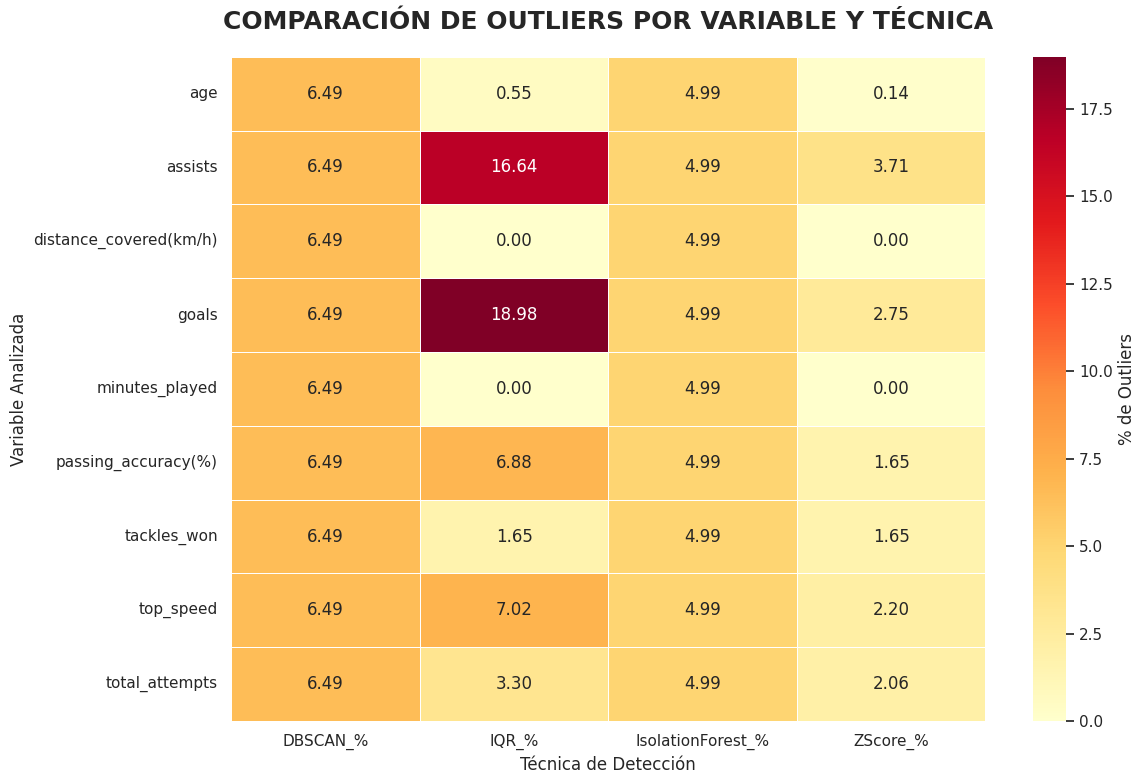

In [66]:
# ==============================================================================
#  OUTLIERS POR VARIABLE Y TÉCNICA
# ==============================================================================

print("\n" + "=" * 100)
print("📈 COMPARACIÓN DE OUTLIERS DETECTADOS POR VARIABLE (IQR vs ZScore vs IF vs DBSCAN)")
print("=" * 100)

comparacion_vars = pd.DataFrame({
    'Variable': vars_total,
    'IQR_%': [resultados_iqr[v]['pct_outliers'] for v in vars_total],
    'ZScore_%': [resultados_z[v]['pct_outliers'] for v in vars_total],
    'IsolationForest_%': [resultados_iforest['pct_outliers']] * len(vars_total),
    'DBSCAN_%': [resultados_dbscan['pct_outliers']] * len(vars_total)
})

display(comparacion_vars.sort_values('IQR_%', ascending=False))


comparacion_vars_melt = comparacion_vars.melt(
    id_vars='Variable',
    var_name='Técnica',
    value_name='%_Outliers'
)

# ===================== HEATMAP =====================
plt.figure(figsize=(12, 8))
pivot = comparacion_vars_melt.pivot(index='Variable', columns='Técnica', values='%_Outliers')

sns.heatmap(
    pivot,
    cmap='YlOrRd',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': '% de Outliers'}
)
plt.title('COMPARACIÓN DE OUTLIERS POR VARIABLE Y TÉCNICA', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Técnica de Detección')
plt.ylabel('Variable Analizada')
plt.tight_layout()
plt.show()
